In [1]:
# Configurações de visualização
%matplotlib inline
%config inlineBackend.figure_formats = ['svg']
# Importação das Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as sts
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.mixture import GaussianMixture

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import KFold, cross_val_score
from sklearn import metrics

from sklearn.pipeline import Pipeline

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

import warnings
warnings.filterwarnings('ignore')
# Configurações de visualização do dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 90)

In [2]:
# Carregamento dos dados em arquivo csv
df = pd.read_csv('CC GENERAL.csv')

**Dicioário dos Dados:**

- **CAST_ID** - Identificação do titular do cartão de crédito (Categórica)

- **BALANCE** - Valor total em dinheiro que você deve à administradora do cartão de crédito

- **BALANCE_FREQUENCY** - Com que frequência o saldo é atualizado, pontuação entre 0 e 1 (1 = atualizado com frequência, 0 = não atualizado com frequência)

- **PURCHASES** - Quantidade de compras feitas na conta

- **ONEOFF_PURCHASES** - Valor máximo de compra feito de uma só vez

- **INSTALLMENTS_PURCHASES** - Valor da compra parcelada

- **CASH_ADVANCE** - Dinheiro adiantado fornecido ao usuário

- **PURCHASES_FREQUENCY** - Com que frequência as compras estão sendo feitas, pontue entre 0 e 1 (1 = compra frequentemente, 0 = não compra com frequência)

- **ONEOFF_PURCHASES_FREQUENCY** -  Com que frequência as compras acontecem de uma só vez (1 = comprado com frequência, 0 = comprado sem frequência)

- **PURCHASES_INSTALLMENTS_FREQUENCY** - Com que frequência as compras parceladas estão sendo feitas (1 = frequentemente feito, 0 = não feito com frequência)

- **CASH_ADVANCE_FREQUENCY** - Com que frequência o adiantamento em dinheiro está sendo realizado

- **CASH_ADVANCE_TRX** - Quantidade de transações realizadas com Dinheiro Antecipado

- **PURCHASES_TRX** - Número de transações de compra feitas

- **CREDIT_LIMIT** - Limite de cartão de crédito para usuário

- **PAYMENTS** - Valor do pagamento feito pelo usuário

- **MINIMUM_PAYMENTS** - Quantidade mínima de pagamentos feitos pelo usuário

- **PRC_FULL_PAYMENT** - Porcentagem do pagamento integral pago pelo usuário

- **TENURE** - Detenção do serviço de cartão de crédito para o usuário

# 1. Análise Exploratória

In [3]:
# Visualização do DataFrame
df.sample(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2139  C12206  2696.774474           1.000000       0.00              0.00   
5363  C15515   923.977036           1.000000       0.00              0.00   
3512  C13612  1225.201454           1.000000    1842.64           1842.64   
6824  C17012   251.273637           0.272727    1861.74           1861.74   
2287  C12358  1283.402142           1.000000    1286.34              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2139                    0.00    139.395627             0.000000   
5363                    0.00   6616.555691             0.000000   
3512                    0.00      0.000000             0.583333   
6824                    0.00      0.000000             0.250000   
2287                 1286.34      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2139                    0.000000                               0.0   
5363                    0.000000                               0.0   
3512                    0.583333                               0.0   
6824                    0.250000                               0.0   
2287                    0.000000                               1.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2139                0.083333                 1              0        3000.0   
5363                0.416667                 6              0        2500.0   
3512                0.000000                 0              8        1200.0   
6824                0.000000                 0             31        3000.0   
2287                0.000000                 0             35        2100.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
2139   685.053764        919.457678               0.0      12  
5363  5155.088326        320.494371               0.2      12  
3512  2326.846060        996.543357               0.0      12  
6824   195.736610        273.119363               0.0      12  
2287  1470.711716       2972.477983               0.0      12

In [4]:
# Colunas
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
# Tamanho do Dataset
df.shape

(8950, 18)

In [6]:
# Informações gerais sobre as colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# Tipos de dados do Dataset
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [8]:
# Valores únicos em cada coluna
df.nunique()

CUST_ID                             8950
BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [9]:
# Descrição estatística do Dataset
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

In [10]:
# Campos duplicados
df.duplicated().sum()

0

In [11]:
# Valores nulos no Dataset
df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

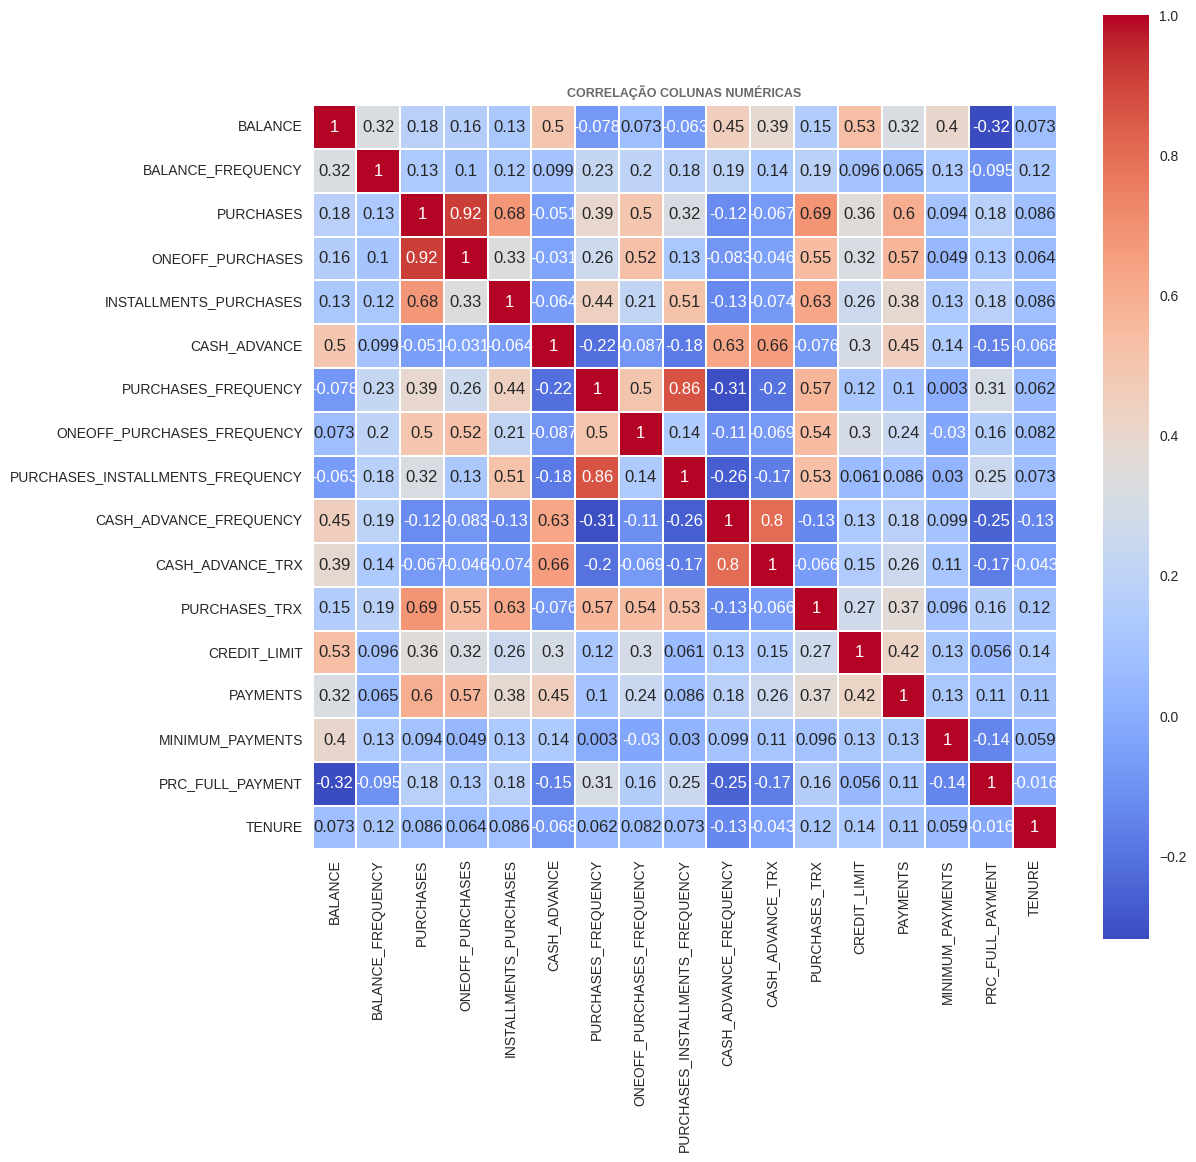

In [12]:
# Correlação entre as colunas
plt.figure(figsize=(12,12)) 
sns.heatmap(data=df.corr(),annot=True,linewidths=0.2,cmap='coolwarm', square=True);
plt.title('CORRELAÇÃO COLUNAS NUMÉRICAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.show();

In [13]:
# Listando as colunas numéricas
v_n = list(df.select_dtypes(include=['float64', 'int64']).columns)

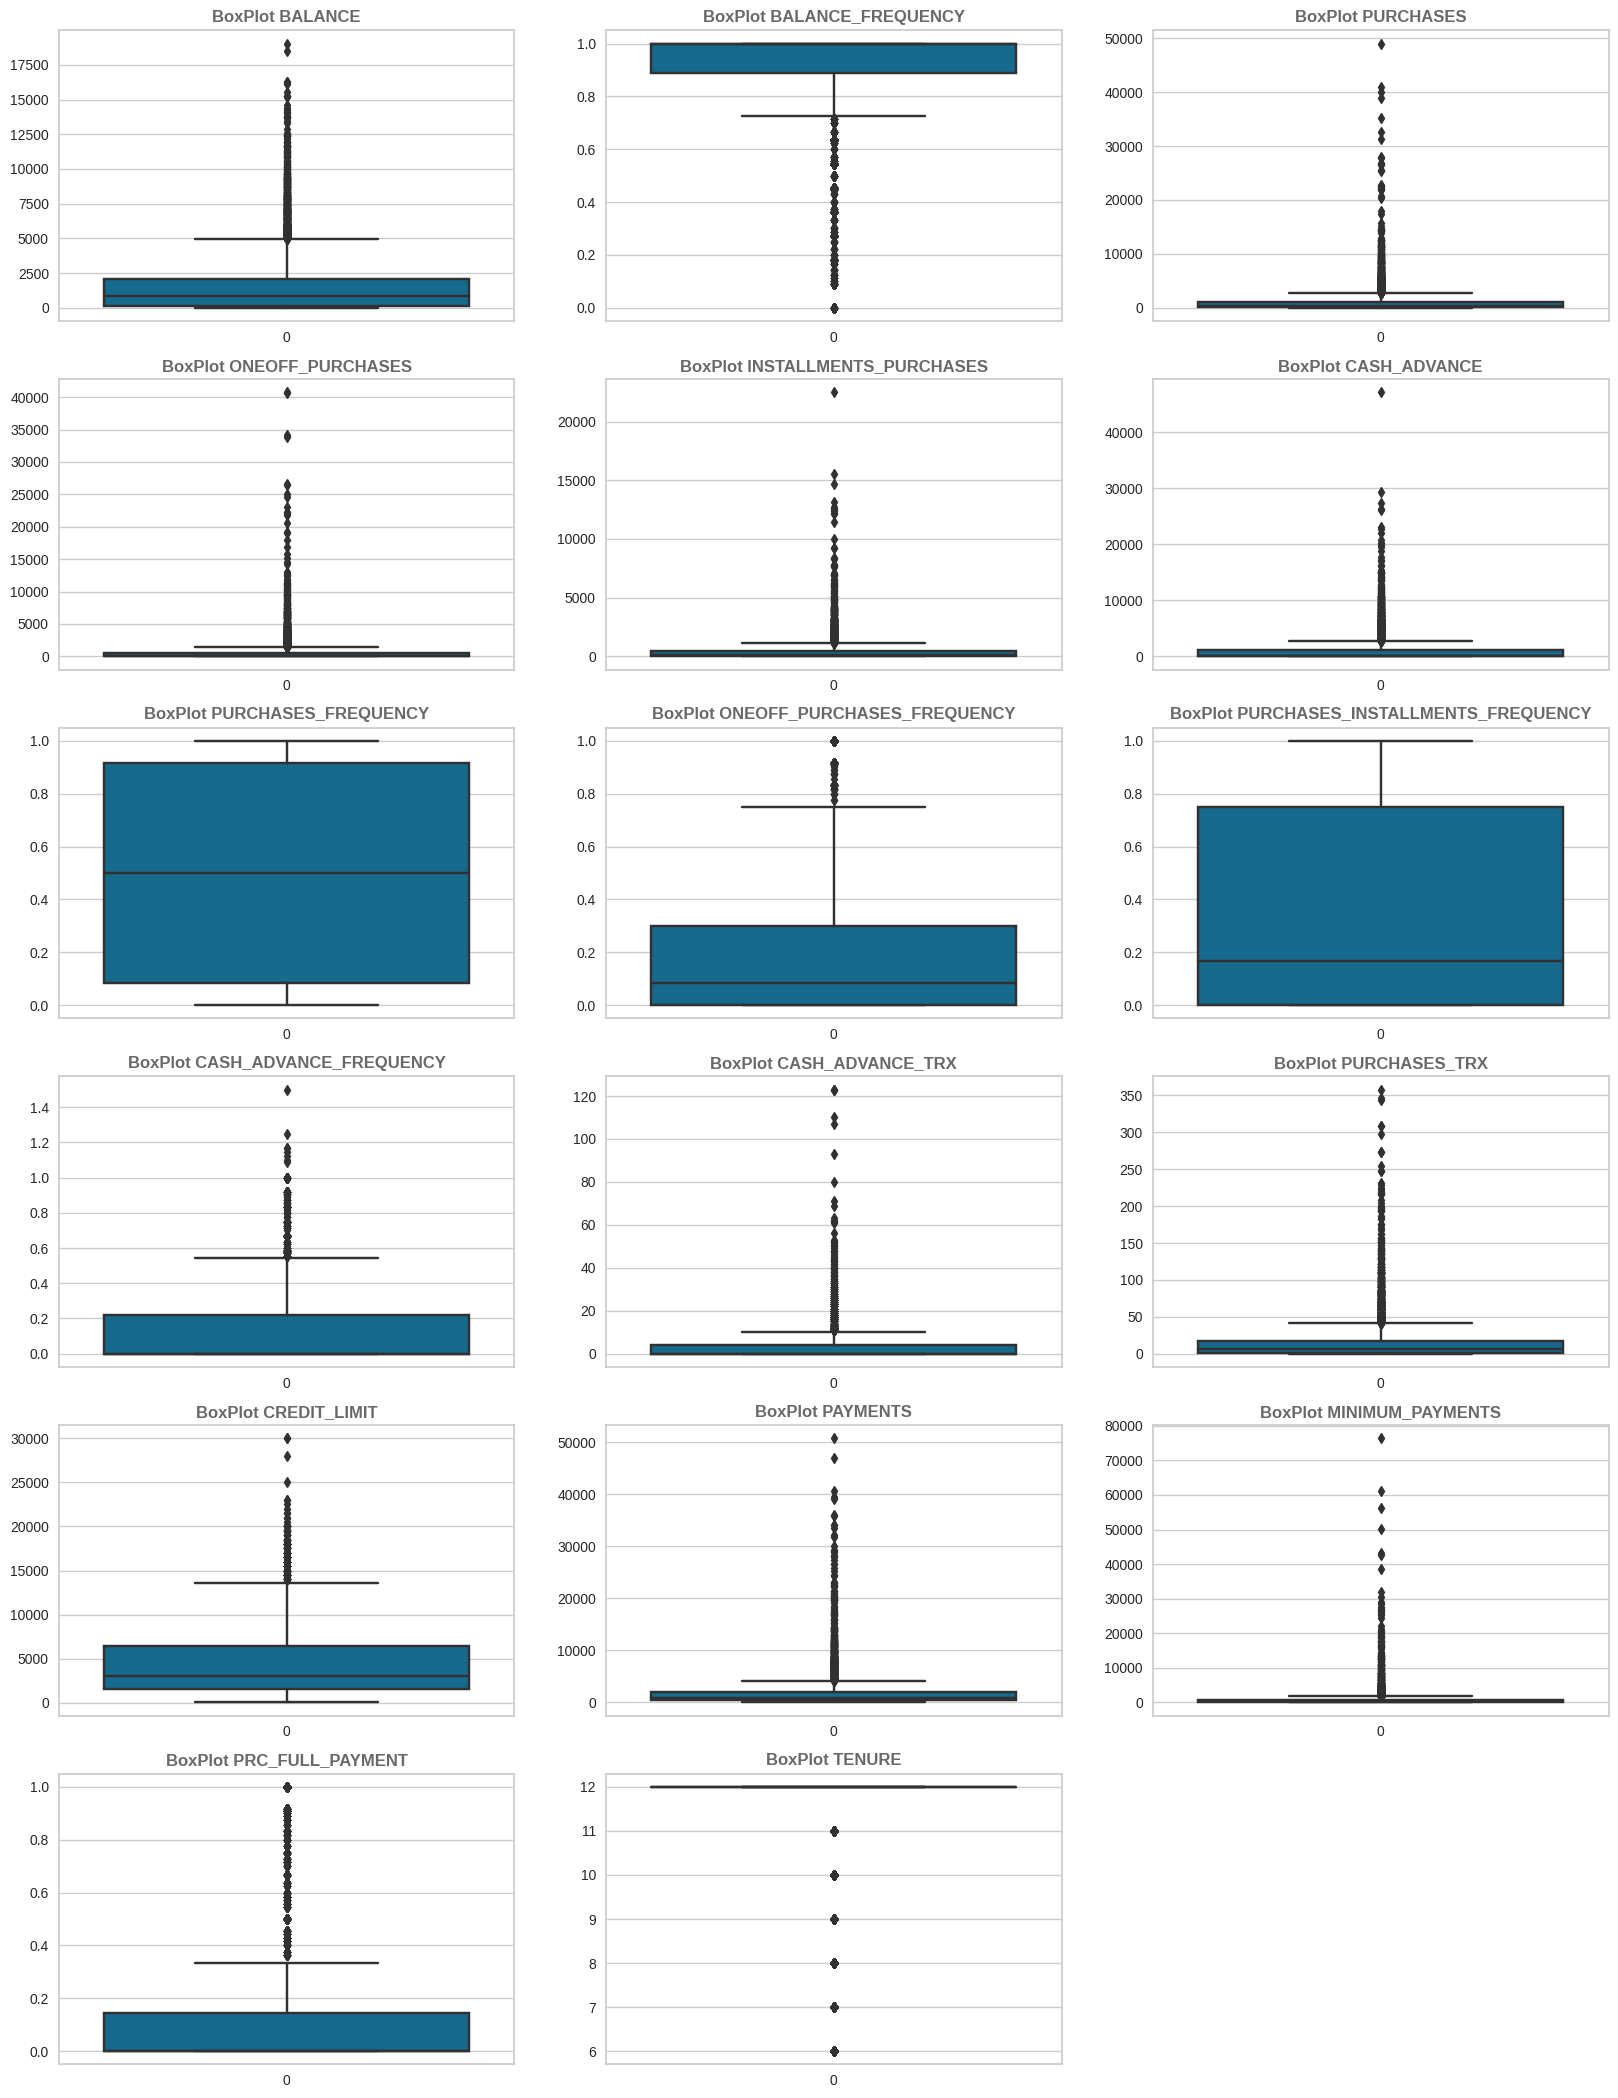

In [14]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

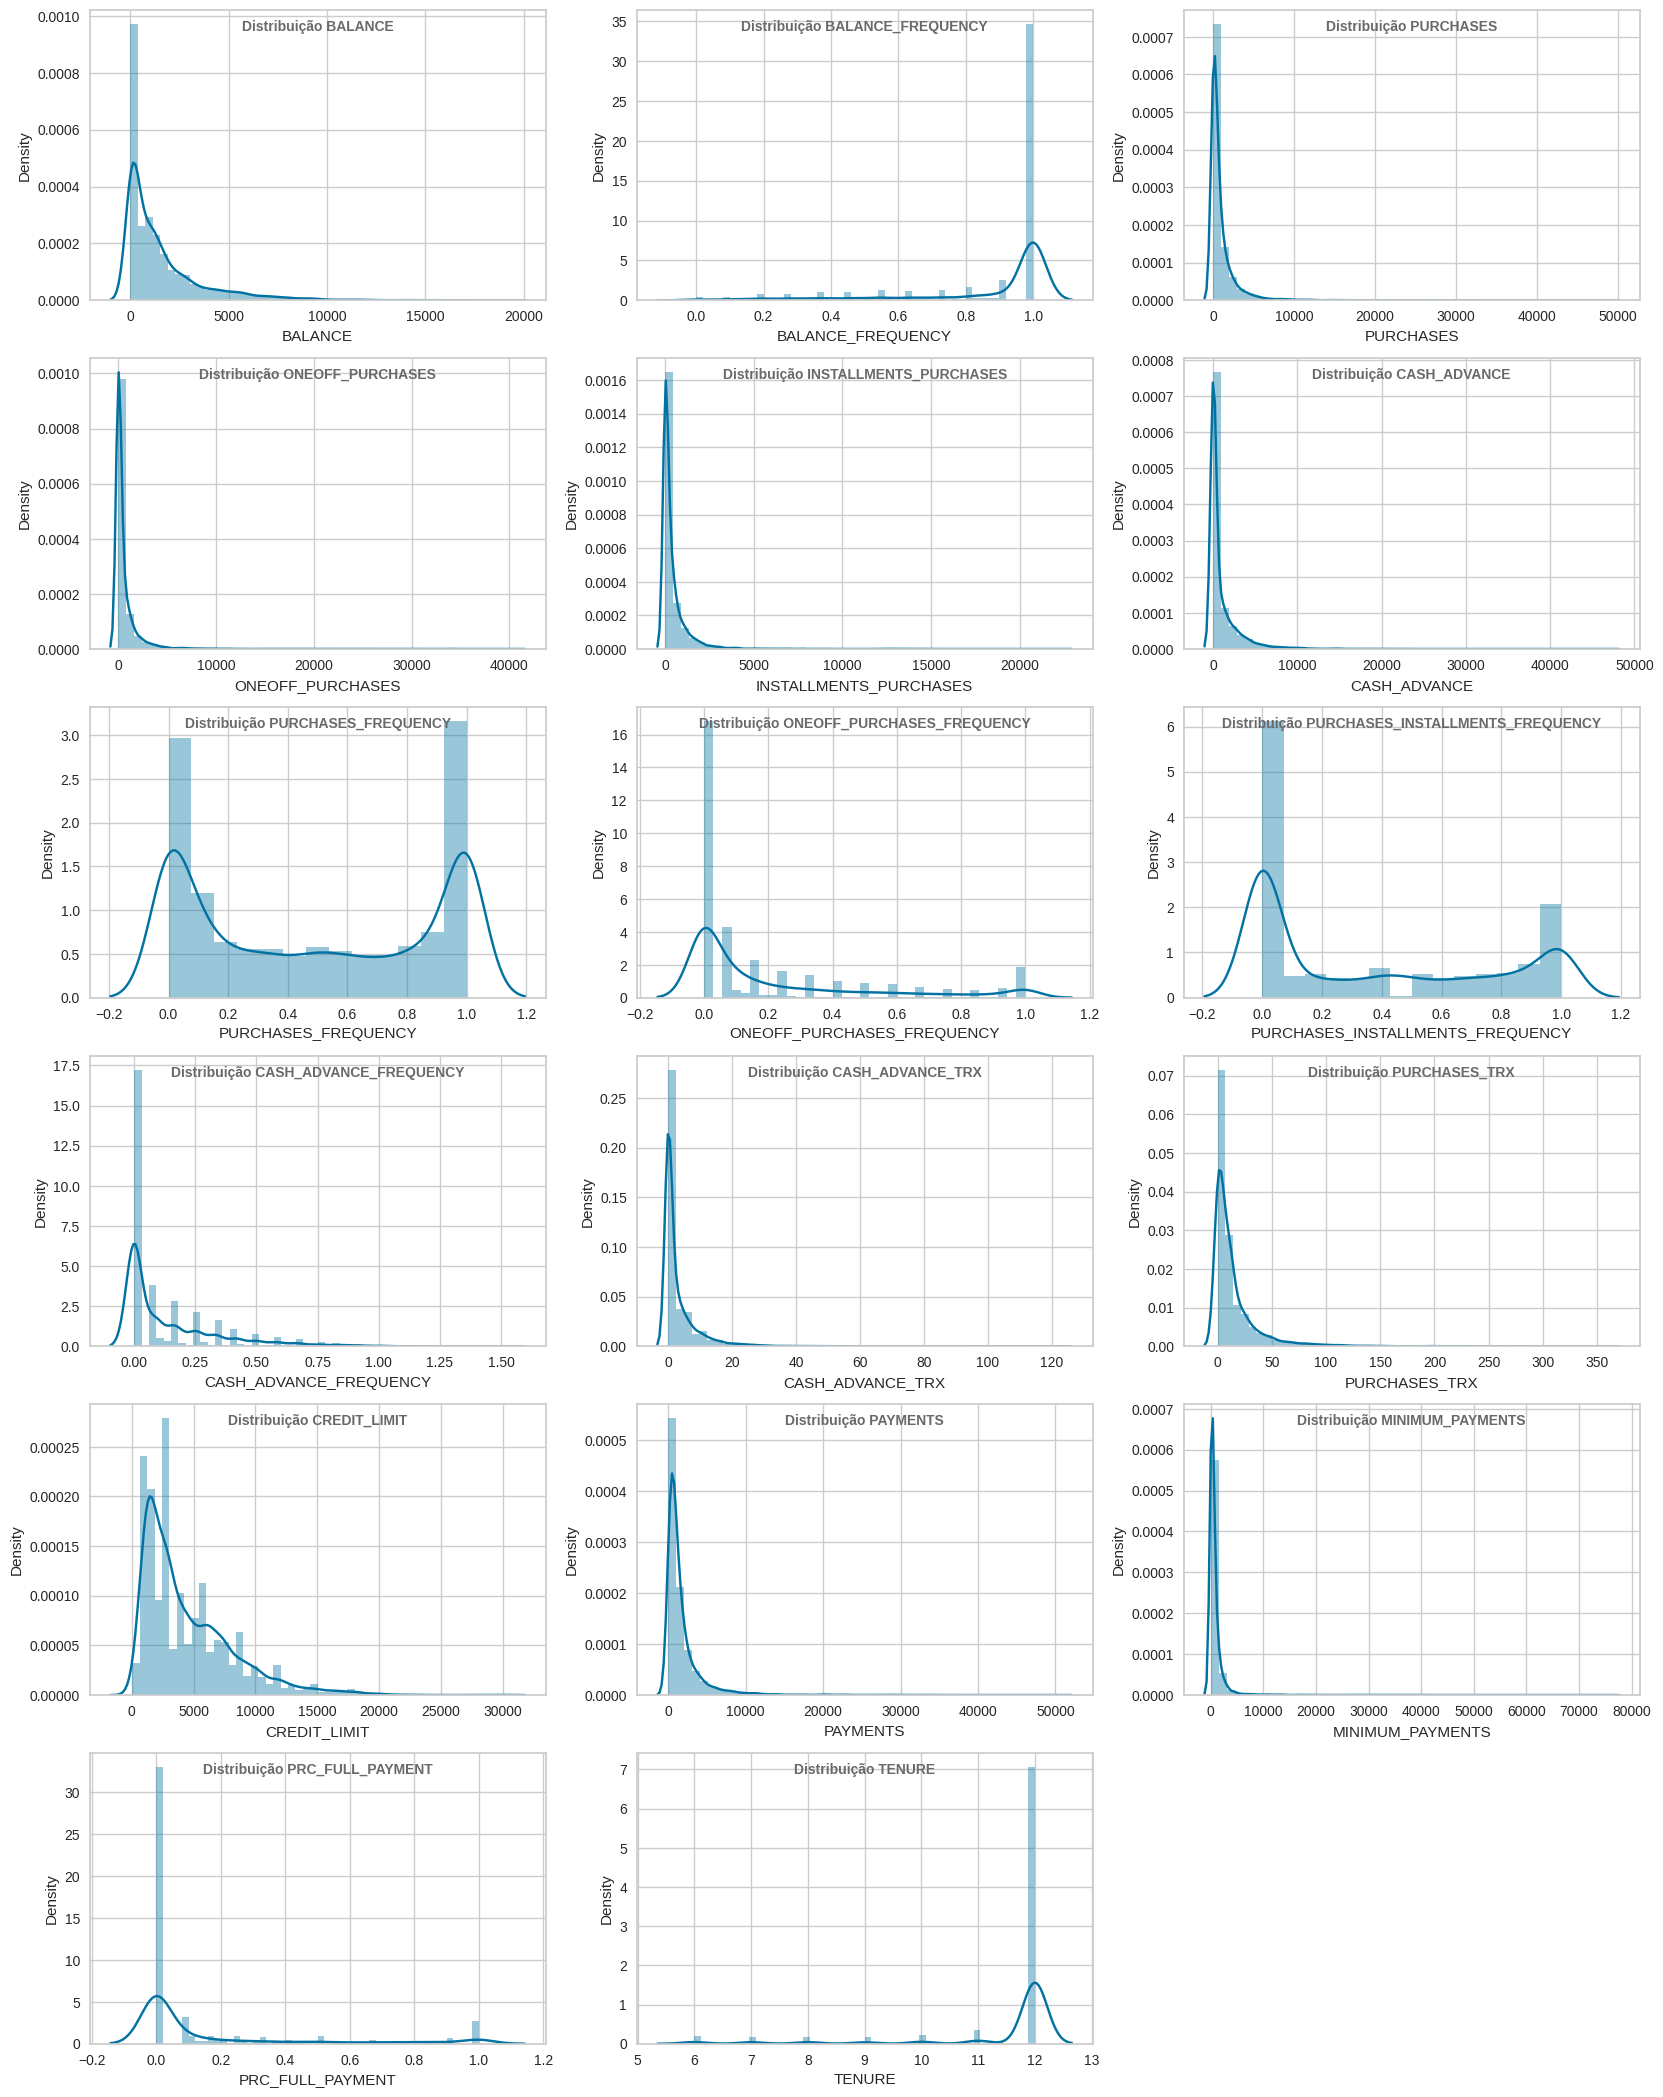

In [15]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df[column])
    plt.title('Distribuição {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

# 2. Pré-processamento

Podemos excluir a coluna CUST_ID, pois não é relevante par a elaboração do nosso modelo de agrupamento.

In [16]:
# Exclusão da coluna CUST_ID
df.drop(['CUST_ID'], axis=1, inplace=True)

Como foi verificado anteriormente CREDIT_LIMIT possui apenas um valor nulo, então podemos excluir este único valor nulo sem problemas.

In [17]:
# Exclusão do valor nulo na coluna CREDIT_LIMIT
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

Na coluna MINIMUM_PAYMENTS constatou-se a presença de 313 valores nulos. Neste caso, é mais pertinente realizar a substituição destes valores pela mediana.

In [18]:
# Substituição dos valores nulos pela mediana
imputer = SimpleImputer(missing_values=np.NaN, strategy='median')
df.MINIMUM_PAYMENTS = imputer.fit_transform(df['MINIMUM_PAYMENTS'].values.reshape(-1,1))[:,0]
df.isnull().sum().sort_values(ascending=False)

BALANCE                             0
CASH_ADVANCE_FREQUENCY              0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
PURCHASES_INSTALLMENTS_FREQUENCY    0
BALANCE_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
TENURE                              0
dtype: int64

In [19]:
# Tamanho do Dataset após as mudanças
df.shape

(8949, 17)

Mediante a análise exploratória feita foi possível identificar um excesso de valores discrepantes (outliers) além de que os dados possuem uma distribuição assimétrica e estão dispostos em escalas diferentes. De modo a lidar com estes obstáculos, vamos utilizar a normalização para colocar todas as colunas na mesma escala (0 a 1), e em seguida aplicaremos a transformação logarítmica para termos uma distribuição mais simétrica e suavizar a influência dos outliers. 

In [20]:
# Colunas para aplicar a Normalização
cols_norm = df.columns

In [21]:
# Cópia do DataFrame
df_norm = df.copy()

In [22]:
# Criação do normalizador
normalizacao = MinMaxScaler()

In [23]:
# Aplica a normalização
df_norm[cols_norm] = normalizacao.fit_transform(df[cols_norm])

In [24]:
# Resumo Estatístico Dados Normalizados
df_norm.describe().T

count      mean       std  min       25%  \
BALANCE                           8949.0  0.082163  0.109309  0.0  0.006741   
BALANCE_FREQUENCY                 8949.0  0.877350  0.236798  0.0  0.888889   
PURCHASES                         8949.0  0.020459  0.043572  0.0  0.000812   
ONEOFF_PURCHASES                  8949.0  0.014536  0.040724  0.0  0.000000   
INSTALLMENTS_PURCHASES            8949.0  0.018272  0.040195  0.0  0.000000   
CASH_ADVANCE                      8949.0  0.020768  0.044493  0.0  0.000000   
PURCHASES_FREQUENCY               8949.0  0.490405  0.401360  0.0  0.083333   
ONEOFF_PURCHASES_FREQUENCY        8949.0  0.202480  0.298345  0.0  0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8949.0  0.364478  0.397451  0.0  0.000000   
CASH_ADVANCE_FREQUENCY            8949.0  0.090094  0.133422  0.0  0.000000   
CASH_ADVANCE_TRX                  8949.0  0.026415  0.055488  0.0  0.000000   
PURCHASES_TRX                     8949.0  0.041094  0.069437  0.0  0.002793   
CREDIT_LIMIT                      8949.0  0.148396  0.121496  0.0  0.051753   
PAYMENTS                          8949.0  0.034174  0.057080  0.0  0.007557   
MINIMUM_PAYMENTS                  8949.0  0.011059  0.030533  0.0  0.002236   
PRC_FULL_PAYMENT                  8949.0  0.153732  0.292511  0.0  0.000000   
TENURE                            8949.0  0.919656  0.222856  0.0  1.000000   

                                       50%       75%  max  
BALANCE                           0.045879  0.107880  1.0  
BALANCE_FREQUENCY                 1.000000  1.000000  1.0  
PURCHASES                         0.007371  0.022638  1.0  
ONEOFF_PURCHASES                  0.000932  0.014176  1.0  
INSTALLMENTS_PURCHASES            0.003956  0.020829  1.0  
CASH_ADVANCE                      0.000000  0.023630  1.0  
PURCHASES_FREQUENCY               0.500000  0.916667  1.0  
ONEOFF_PURCHASES_FREQUENCY        0.083333  0.300000  1.0  
PURCHASES_INSTALLMENTS_FREQUENCY  0.166667  0.750000  1.0  
CASH_ADVANCE_FREQUENCY            0.000000  0.148148  1.0  
CASH_ADVANCE_TRX                  0.000000  0.032520  1.0  
PURCHASES_TRX                     0.019553  0.047486  1.0  
CREDIT_LIMIT                      0.098497  0.215359  1.0  
PAYMENTS                          0.016897  0.037485  1.0  
MINIMUM_PAYMENTS                  0.004089  0.010322  1.0  
PRC_FULL_PAYMENT                  0.000000  0.142857  1.0  
TENURE                            1.000000  1.000000  1.0

In [25]:
# Aplicar a transformação logarítmica em todas as colunas
df_norm = df_norm.apply(lambda x: np.log(x + 1))

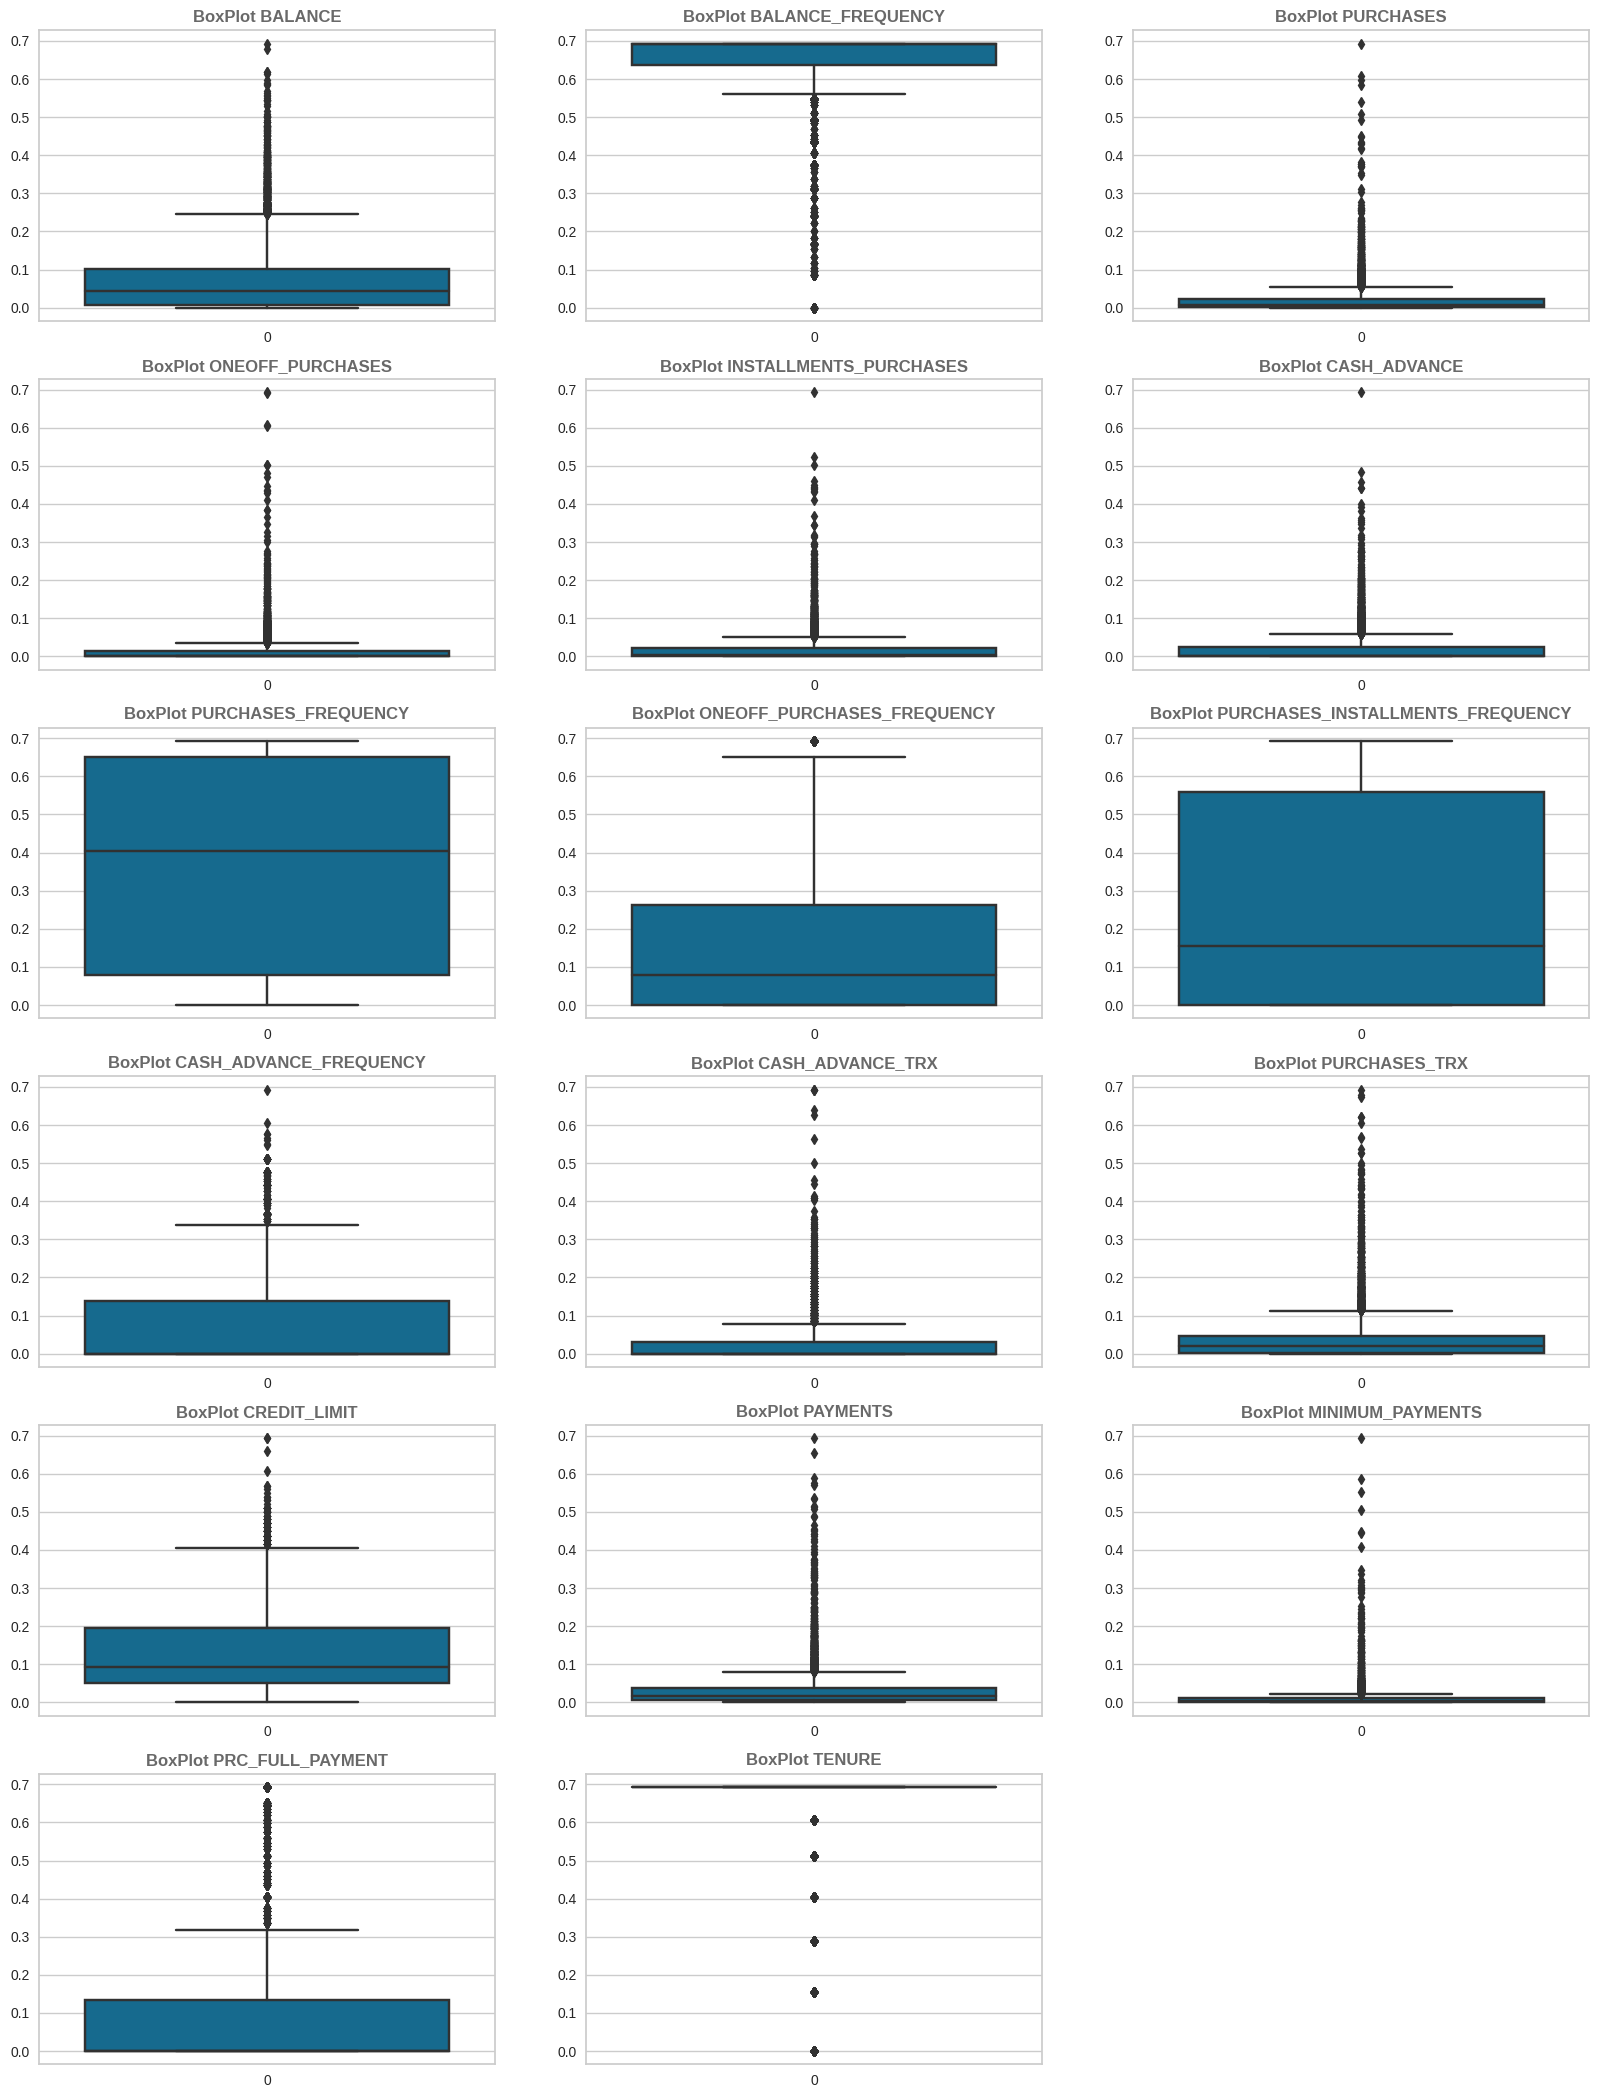

In [26]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.boxplot(df_norm[column])
    plt.title('BoxPlot {}'.format(column), fontsize=12, color ='dimgrey', fontweight = 'bold')
    x += 1

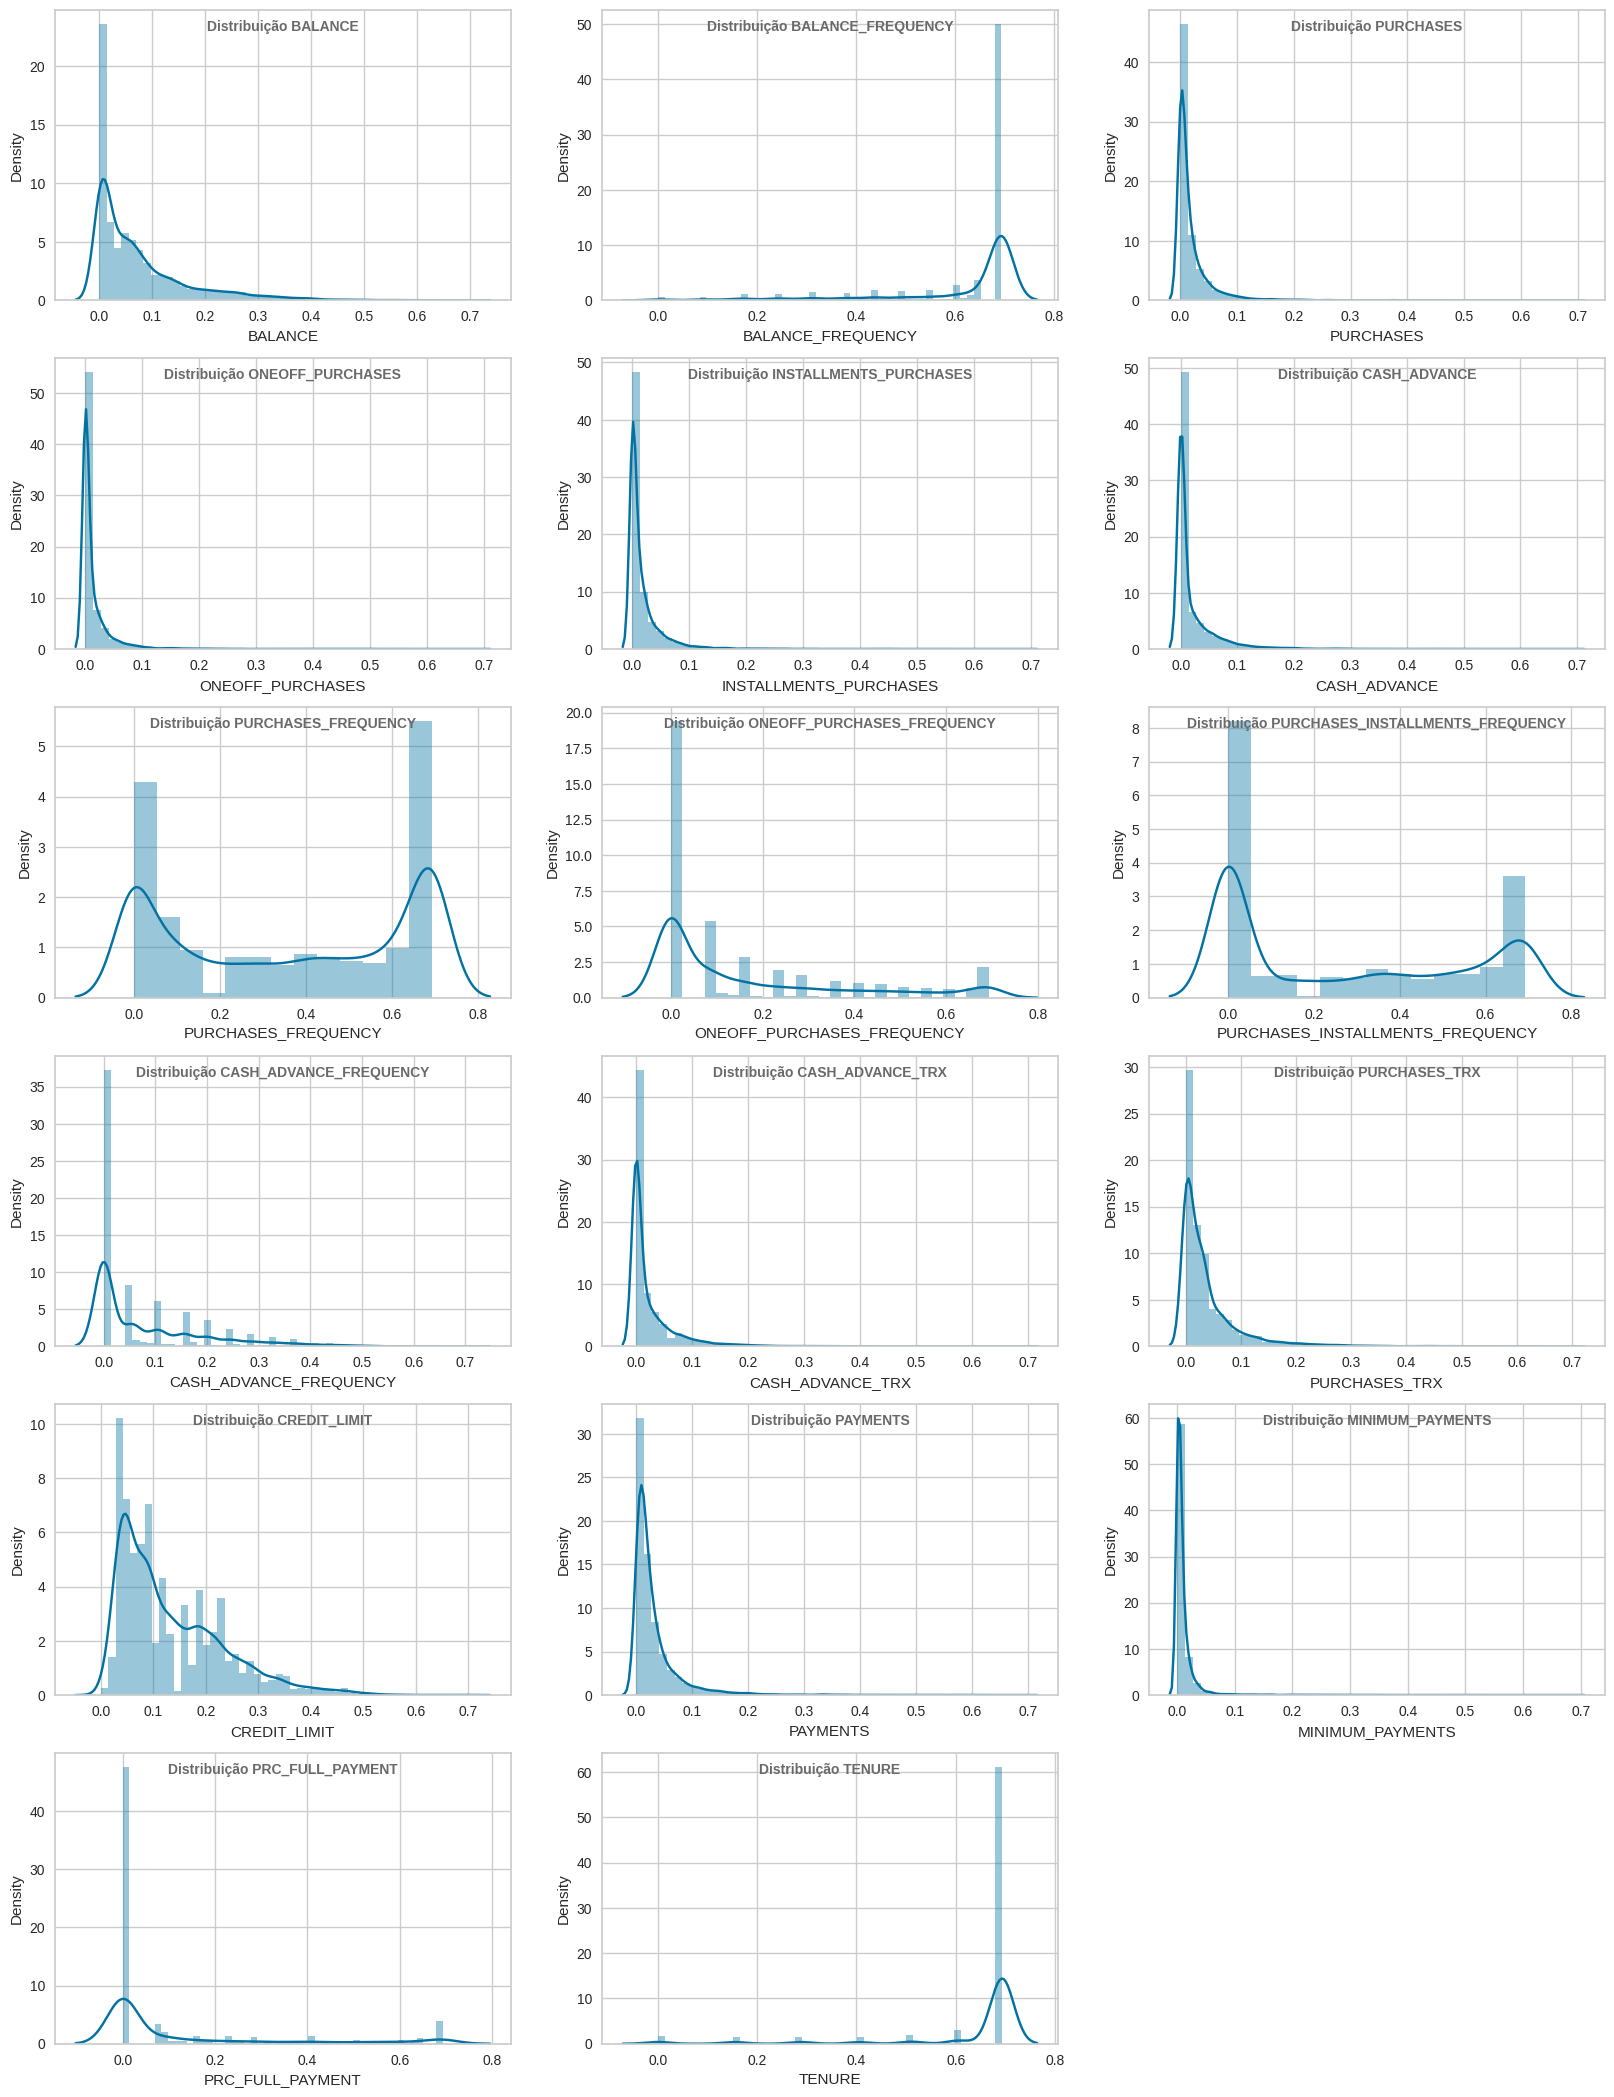

In [27]:
# Plot
plt.figure(figsize = (20,40))
x = 1
for column in v_n:
    plt.subplot(9, 3, x)
    sns.distplot(df_norm[column])
    plt.title('Distribuição {}'.format(column), fontsize=10, color ='dimgrey', fontweight = 'bold', y=0.90)
    x += 1

# 3. Análise de Componentes Principais (Principal Component Analysis - PCA)

A análise de componentes principais (PCA) é um método usado em aprendizado de máquina não supervisionado que reduz dados de alta dimensão para dimensões menores, preservando o máximo de informações possível. Ao usar o PCA antes de aplicar o algoritmo de agrupamento, ele permite reduzir dimensões, ruído de dados e diminuir o custo de computação. Neste notebook, vamos tentar encontrar o número ideal para este conjunto de dados.

In [28]:
# Instanciar o PCA
pca = PCA()

# Aplicar o PCA
df_pca = pca.fit_transform(df_norm)

Quantidade de variação explicada por cada um dos componentes:

In [29]:
# Tabela quantidade de variação explicada
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Nº de Componentes'])
ev = pca.explained_variance_
df_ev = pd.DataFrame(ev, columns=['Variância Explicada'])
df_ev = pd.concat([df_com, df_ev], axis=1)
df_ev.index = df_ev.index + 1
df_ev
df_ev.style.set_properties(**{'text-align': 'center'})

Porcentagem da variância explicada por cada um dos componentes selecionados:

In [30]:
# Tabela Porcentagem da variância explicada
num_com = range(1, 18)
df_com = pd.DataFrame(num_com, columns=['Nº de Componentes'])
pev = (pca.explained_variance_ratio_) * 100
df_pev = pd.DataFrame(pev, columns=['Porcentagem da Variância Explicada'])
df_pev = pd.concat([df_com, df_pev], axis=1)
df_pev.index = df_ev.index + 1
df_pev
df_pev.style.set_properties(**{'text-align': 'center'})

Porcentagem cumulativa da variância explicada por cada um dos componentes selecionados:

In [31]:
# Tabela Porcentagem cumulativa da variância explicada
num_com = range(1, 18)
com = pd.DataFrame(num_com, columns=['Nº de Componentes'])
cpev = (pca.explained_variance_ratio_.cumsum()) * 100
df_cpev = pd.DataFrame(cpev, columns=['Porcentagem Cumulativa da Variância Explicada'])
df_cpev = pd.concat([df_com, df_cpev], axis=1)
df_cpev.index = df_cpev.index + 1
df_cpev
df_cpev.style.set_properties(**{'text-align': 'center'})

Isto nos diz a quantidade de variância explicada à medida que adicionamos componentes principais. PC1 sozinho explica 48%, PC1 e PC2 explicam 63%, PC1, PC2 e PC3 explicam 76%, assim em diante até 100% explicado por todos os 17 componentes principais.

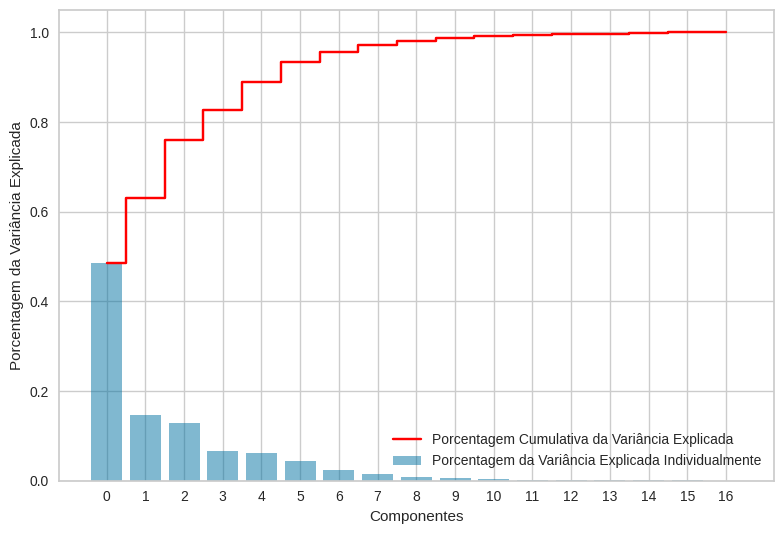

In [32]:
# Plot

# Intanciar a Porcentagem da variância explicada
pve = pca.explained_variance_ratio_

# Intanciar a Porcentagem cumulativa da variância
pcve = np.cumsum(pve)

# Plot
plt.bar(range(0,len(pve)), pve, alpha=0.5, align='center', label='Porcentagem da Variância Explicada Individualmente')
plt.step(range(0,len(pcve)), pcve, where='mid',label='Porcentagem Cumulativa da Variância Explicada', color='red')
plt.xticks(range(0, 17))
plt.ylabel('Porcentagem da Variância Explicada')
plt.xlabel('Componentes')
plt.legend(loc='best')
plt.tight_layout()
plt.show();

No gráfico apresentado, cada barra ilustra a porcentagem de variação explicada pelos componentes individuais e o gráfico de etapas exibe as porcentagens cumulativas de variação explicada após a aplicação do PCA (Análise de Componentes Principais). O número de barras corresponde ao número de variáveis presentes no conjunto de dados original. Com esse gráfico, é possível ter uma visão geral de quantos componentes devem ser preservados. 

Agora vamos plotar um gráfico Scree plot para selecionar os componentes principais a serem mantidos, o gráfico Scree plot é usado para visualizar a quantidade de variação nos dados que é explicada por cada componente principal gerada pelo PCA.

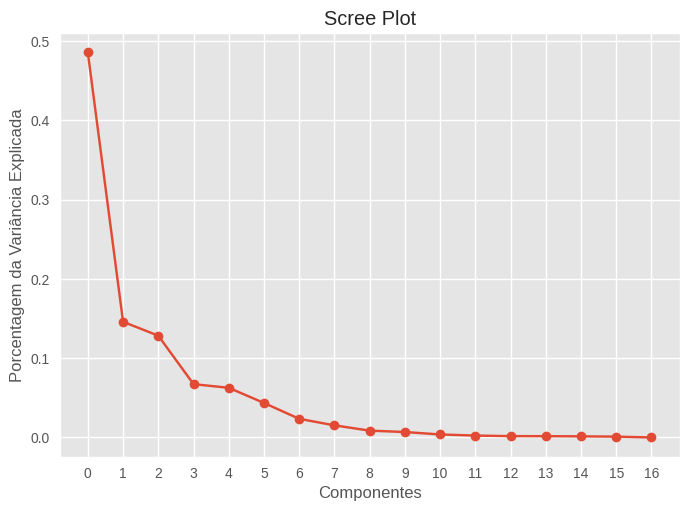

In [33]:
# Plot
plt.style.use('ggplot')
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Componentes') 
plt.ylabel('Porcentagem da Variância Explicada') 
plt.title('Scree Plot')
plt.show();

O eixo y mostra a porcentagem da variância explicada e o eixo x o número de componentes principais. A parte inclinada do gráfico representa os componentes principais que explicam a maior parte da variação dos dados. Esses componentes principais geralmente são consideradas os mais importantes e devem ser selecionados. A parte plana do gráfico representa as componentes principais que explicam menos da variação dos dados e podem ser descartadas sem afetar significativamente a qualidade do agrupamento. Assim, Uma curva ideal deve ser íngreme, depois dobra em um "cotovelo" (este é o ponto de corte) e depois achata. Portanto, selecionamos todos os componentes até o ponto onde ocorre a dobra no Scree Plot. No gráfico acima, percebemos visualmente que a dobra ocorre com 4 componentes. Logo, essa deve ser a nossa escolha.

Geralmente é recomendado utilizar pelo menos 80% da variação dos dados ao aplicar PCA, isto é importante porque a variância dos dados representa a quantidade de informação e a diversidade presentes nos dados. Quanto maior for a variância dos dados, mais informação e diversidade eles contêm. Então, ao se utilizar o PCA para reduzir a dimensionalidade dos dados, a ideia é preservar a maior quantidade de informação e diversidade possíveis.

 Preservando a variância dos dados originais, garante-se que a maior parte da informação presente nos dados originais esteja presente na representação reduzida dos dados. Isso é fundamental, pois ao se utilizar uma representação reduzida dos dados, é comum que haja perda de informação. Por isso, quanto mais variância dos dados originais for preservada, menos perda de informação haverá.

 Além disso, ao preservar a variância dos dados, também é possível preservar a diversidade dos dados para garantir que os resultados obtidos ao utilizar o PCA sejam representativos dos dados originais, e que sejam possíveis de serem interpretados.
 
 Deste modo, vamos verificar graficamente se ao escolher 4 componentes temos pelo menos 80% da variação dos dados.

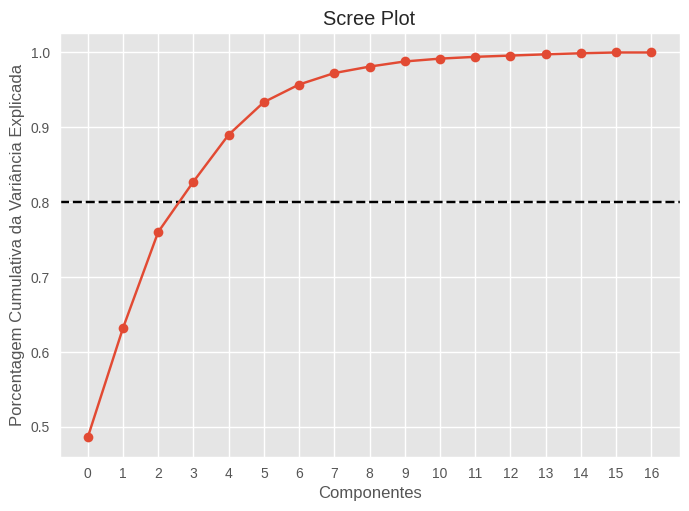

In [34]:
# Plot
plt.style.use('ggplot')
plt.axhline(y=0.8, color='black', linestyle='--')
plt.plot(pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xticks(range(0, 17))
plt.xlabel('Componentes') 
plt.ylabel('Porcentagem Cumulativa da Variância Explicada') 
plt.title('Scree Plot')
plt.show();

Com 4 componentes temos um pouco mais de 80% da variação dos dados originais, o que configura-se como uma escolha adequada.

In [35]:
# Aplica o PCA a 4 componentes
pca1 = PCA(n_components=4, random_state=18)
df_pca1 = pca1.fit_transform(df_norm)
df_pca1.shape

(8949, 4)

# 4. K-Means

Uma vez que descobrimos o número ideal de PCA, vamos utilizar o algoritmo de agrupamento K-Means, ele funciona dividindo os dados em k grupos com base nas distâncias entre os pontos de dados e os centroides, e de forma interativa atribui cada ponto ao grupo mais próximo e recalcula os centroides até que os grupos não mudem mais.

O número de k no algoritmo k-means deve ser fornecido previamente. Este número representa o número de grupos (ou clusters) em que o conjunto de dados será dividido. Escolher o número correto de k é importante para o desempenho do algoritmo e para a interpretação dos resultados. Vamos utilizar algumas técnica e métricas para determinar o valor ideal de k.

**Método "cotovelo":** Consiste em plotar o valor da inércia (distortion score) que é a soma das distâncias quadráticas das amostras para o centro do cluster mais próximo, em relação ao número de clusters e escolher o ponto de torção ou "cotovelo" na curva como o melhor valor de k. Esse ponto é geralmente o ponto onde a inércia começa a diminuir mais lentamente, indicando que adicionar mais clusters não vai melhorar significativamente a qualidade do agrupamento.

 Quando o número de clusters aumenta, cada cluster fica menor e mais específico, permitindo que os pontos dentro de um cluster sejam mais similares entre si e menos distantes do seu centro. Isso faz com que a inércia diminua, pois, as distâncias entre as amostras e seus respectivos centros de cluster são menores, por esse motivo o valor de inércia tende a diminuir quando o número de clusters aumenta.

Em outras palavras, a inércia mede a dissimilaridade dos dados dentro do cluster. Quanto menor for a inércia, menor será a dissimilaridade, portanto, melhor será o modelo de agrupamento no algoritmo k-means. No entanto, é importante evidenciar que a inércia é uma medida de dissimilaridade interna e não considera a dissimilaridade entre os clusters.

Vamos testar e avaliar de 2 a 10 clusters para todas as métricas

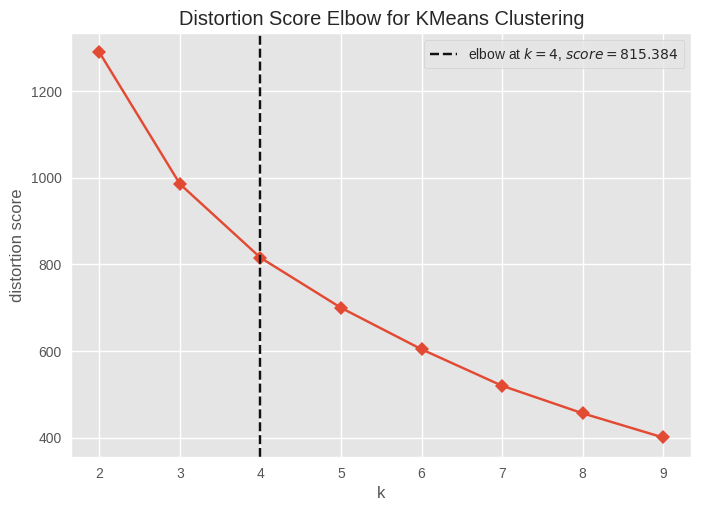

In [36]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Através do gráfico a escolha ideal seria com 4 clusters

**Índice de Silhoutte:** Mede a similaridade de cada amostra com os outros pontos dentro de seu próprio cluster em relação aos outros clusters. Um valor Silhouette positivo indica que a amostra está mais próxima dos pontos dentro do seu próprio cluster do que dos outros clusters.

Valores Silhouette mais próximos de 1 indicam que as amostras estão mais bem agrupadas, enquanto valores mais próximos de -1 indicam que as amostras estão mal agrupadas e talvez deveriam estar em outro cluster. Valores próximos de 0 indicam que a amostra está "na fronteira" entre dois clusters.

A métrica Silhouette é útil para avaliar a qualidade do agrupamento em relação aos outros clusters, e não apenas em relação ao seu próprio cluster, e é uma boa maneira de determinar o número correto de clusters a ser escolhido.


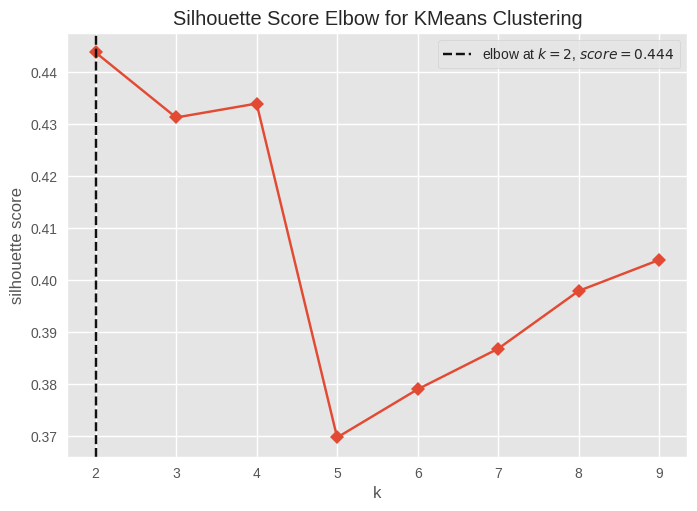

In [37]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Através do gráfico do Índice de Silhoutte a melhor escolha seria com 2 clusters.

**Índice de Calinski-Harabasz:** Mede a relação entre a variação dentro dos agrupamentos (intra-cluster) e a variação entre os agrupamentos (inter-cluster). Ou seja, ela é baseada na razão entre a soma das distâncias entre os pontos de um grupo e a média do grupo e a soma das distâncias entre cada ponto e a média geral dos dados. Quanto maior o valor desta métrica, melhor é o agrupamento, pois indica que os clusters são mais distintos e compactos, enquanto um valor baixo indica que os clusters são sobrepostos e dispersos.

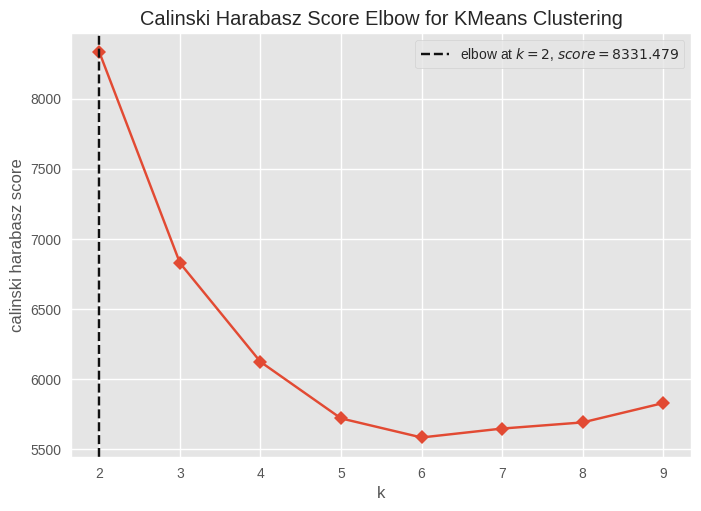

In [38]:
# Plot
model = KMeans(random_state=18)
visualizer = KElbowVisualizer(model, k=(2,10), metric='calinski_harabasz', timings=False)

visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Através do gráfico do Índice de Calinski-Harabasz a melhor escolha também seria com 2 clusters.

**Índice de Davies-Bouldin:**  É uma medida de similaridade entre as amostras de dados em um agrupamento. É calculada como a média das distâncias entre cada ponto de dados e o centro do cluster mais próximo. Geralmente quanto menor o valor de Davies-Bouldin, melhor é o modelo de agrupamento. Isso ocorre porque o valor de Davies-Bouldin mede a similaridade entre cada cluster e seus vizinhos mais próximos, e quanto menor for esse valor, menor será a similaridade, portanto, melhor será a separação entre os clusters.

Os gráficos nos deram uma boa noção, mas vamos avaliar todos os valores e colocar em formato de DataFrame para um melhor entendimento geral.

In [39]:
# Avalição das métricas para diversos valores diferentes de clusters

# Métricas

n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state = 18)
    pred = kmeans.fit_predict(df_pca1)

    silhouette.append(silhouette_score(df_pca1, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca1, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca1, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
# Resultados
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin,
    'Inertia': inertia})

result.sort_values('Silhouette', ascending=False)

Clusters  Silhouette  Calinski Harabasz  Davies Bouldin      Inertia
0         2    0.443808        8331.478560        0.939435  1289.072718
2         4    0.433986        6121.705972        1.005715   815.386780
1         3    0.431311        6827.227169        1.131881   985.411788
7         9    0.403950        5827.133646        0.874072   400.593504
6         8    0.397981        5689.164164        0.938710   456.438621
8        10    0.389997        5724.592723        0.894033   368.068772
5         7    0.386876        5645.241729        1.006785   519.949188
4         6    0.379076        5581.639366        1.100599   604.139368
3         5    0.369813        5717.935353        1.120999   699.838150

As métricas de avaliação para 2, 3 e 4 clusters apresentaram os melhores resultados, mas não diferem muito entre si, vamos verificar como se comporta a distribuição dos clusters em termos do coeficiente de Silhouette.

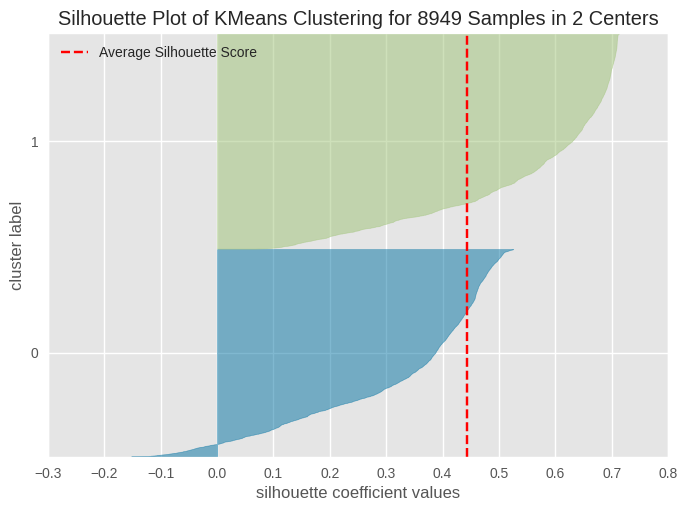

In [40]:
# Plot
model = KMeans(n_clusters=2, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

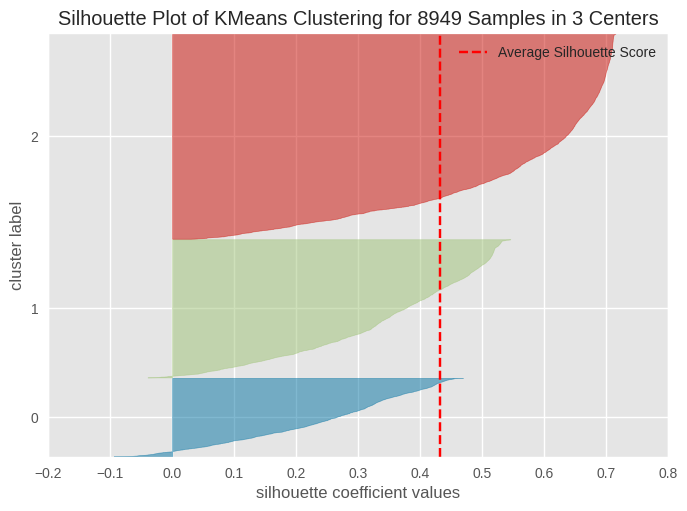

In [41]:
# Plot
model = KMeans(n_clusters=3, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

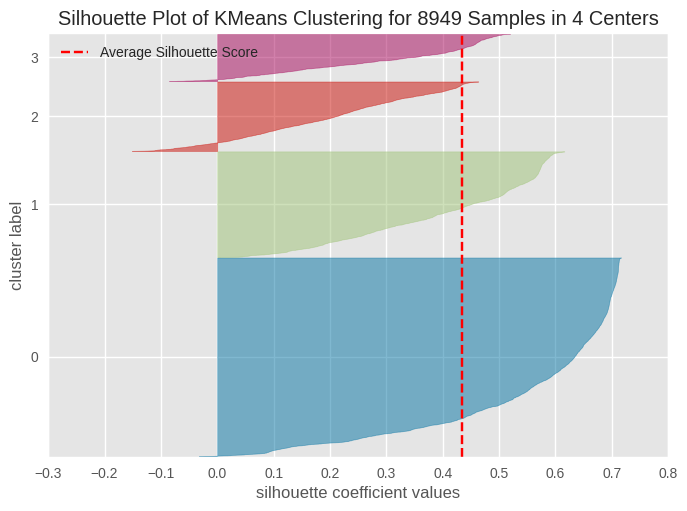

In [42]:
# Plot
model = KMeans(n_clusters=4, random_state=18)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Em todas as situações cada amostra de clusters ficou acima da média no coeficiente de Silhouette e apresentaram um equilíbrio plausível nas distribuições.

Para a escolha final do número de clusters vamos plotar um gráfico de dispersão para 2, 3, e 4 clusters com às três features mais valiosas para a tarefa de segmentação de cartões de crédito: PURCHASES, BALANCE e CREDIT_LIMIT, e averiguar o comportamento de cada.

2 Clusters

In [43]:
# Aplica o algoritmo K-Means para 2 Clusters
kmeans1 = KMeans(n_clusters=2, random_state=18)
kmeans1.fit(df_pca1)
labels1 = kmeans1.labels_

In [44]:
# Cópia do Dataframe Original
df1 = df.copy()

In [45]:
# Anexar o resultado dos clusters ao Dataframe
df1['cluster'] = labels1

In [46]:
y_kmeans = kmeans1.fit_predict(df_pca1)
y_kmeans

array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

In [47]:
# Quantidade de cada clusters
df1['cluster'].value_counts()

1    4557
0    4392
Name: cluster, dtype: int64

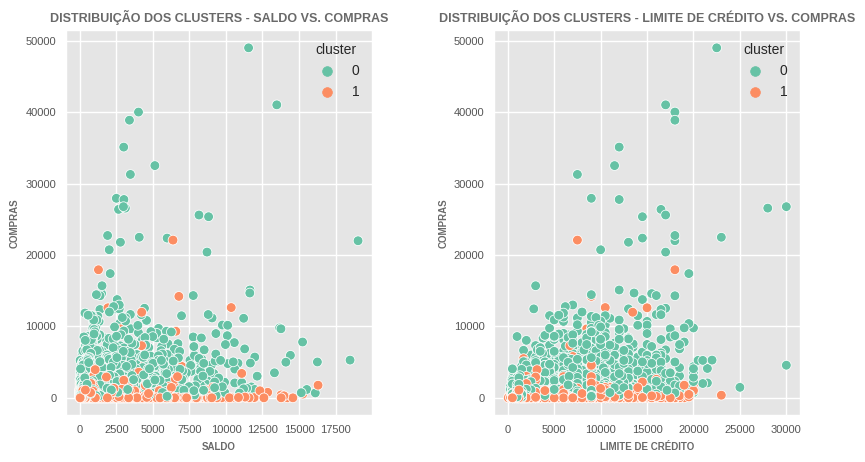

In [48]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df1, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df1, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

3 Clusters

In [49]:
# Aplica o algoritmo K-Means para 3 Clusters
kmeans2 = KMeans(n_clusters=3, random_state=18)
kmeans2.fit(df_pca1)
labels2 = kmeans2.labels_

In [50]:
# Cópia do Dataframe Original
df2 = df.copy()

In [51]:
# Anexar o resultado dos clusters ao Dataframe
df2['cluster'] = labels2

In [52]:
# Quantidade de cada clusters
df2['cluster'].value_counts()

2    4352
1    2933
0    1664
Name: cluster, dtype: int64

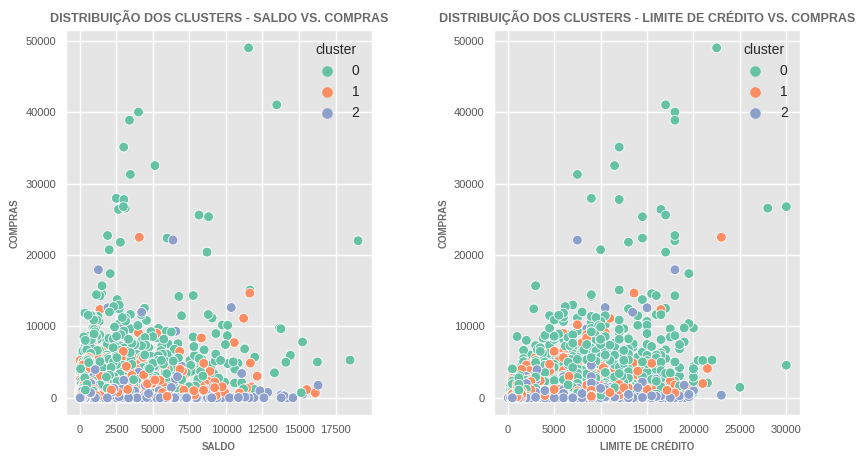

In [53]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df2, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df2, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

4 Clusters

In [54]:
# Aplica o algoritmo K-Means para 3 Clusters
kmeans3 = KMeans(n_clusters=4, random_state=18)
kmeans3.fit(df_pca1)
labels3 = kmeans3.labels_

In [55]:
# Cópia do Dataframe Original
df3 = df.copy()

In [56]:
# Anexar o resultado dos clusters ao Dataframe
df3['cluster'] = labels3

In [57]:
# Quantidade de cada clusters
df3['cluster'].value_counts()

0    4224
1    2245
2    1475
3    1005
Name: cluster, dtype: int64

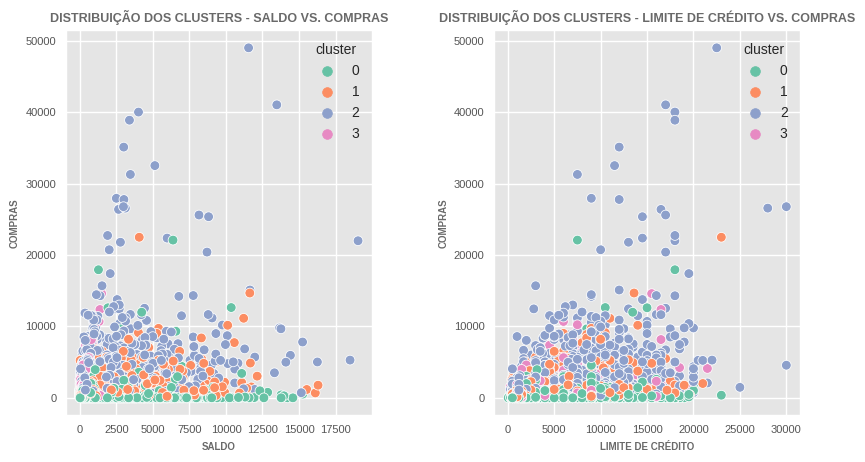

In [58]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df3, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df3, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Para 4 clusters não é possível identificar visualmente de forma clara o último cluster e apresenta uma distribuição mais confusa. 

2 e 3 clusters apresentam uma distribuição mais ordenada e é possível verificar visualmente uma certa distinção entre os clusters. Vamos optar por 3 clusters, pois podemos obter uma segmentação mais detalhada sobre as características dos clientes, por exemplo, pelo gráfico podemos notar que indivíduos do grupo 0, 1 e 2 são os que realizam mais compras na respectiva ordem.

In [59]:
# Cópia do Dataframe Original
df_kmeans = df.copy()

In [60]:
# Anexar o resultado final dos clusters ao Dataframe original
df_kmeans['cluster'] = labels2

In [61]:
df_kmeans.describe().T

count         mean          std        min  \
BALANCE                           8949.0  1564.647593  2081.584016   0.000000   
BALANCE_FREQUENCY                 8949.0     0.877350     0.236798   0.000000   
PURCHASES                         8949.0  1003.316936  2136.727848   0.000000   
ONEOFF_PURCHASES                  8949.0   592.503572  1659.968851   0.000000   
INSTALLMENTS_PURCHASES            8949.0   411.113579   904.378205   0.000000   
CASH_ADVANCE                      8949.0   978.959616  2097.264344   0.000000   
PURCHASES_FREQUENCY               8949.0     0.490405     0.401360   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8949.0     0.202480     0.298345   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8949.0     0.364478     0.397451   0.000000   
CASH_ADVANCE_FREQUENCY            8949.0     0.135141     0.200132   0.000000   
CASH_ADVANCE_TRX                  8949.0     3.249078     6.824987   0.000000   
PURCHASES_TRX                     8949.0    14.711476    24.858552   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8949.0  1733.336511  2895.168146   0.000000   
MINIMUM_PAYMENTS                  8949.0   845.003358  2332.905284   0.019163   
PRC_FULL_PAYMENT                  8949.0     0.153732     0.292511   0.000000   
TENURE                            8949.0    11.517935     1.337134   6.000000   
cluster                           8949.0     1.300369     0.762953   0.000000   

                                          25%          50%          75%  \
BALANCE                            128.365782   873.680279  2054.372848   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.800000   361.490000  1110.170000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.830000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.650000   
CASH_ADVANCE                         0.000000     0.000000  1113.868654   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.282850   857.062706  1901.279320   
MINIMUM_PAYMENTS                   170.875613   312.452292   788.721609   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   
cluster                              1.000000     1.000000     2.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000  
cluster                               2.00000

Anteriormente encontramos que o melhor número de PCAs para os dados foram 4, agora vamos utilizar PCAs igual a 2 com o intuito de visualizar os dados através de um gráfico de 2 dimensões de modo que o agrupamento seja visualizado de maneira mais ordenada.

In [63]:
# Aplica o PCA a 2 componentes para visualização
pca2 = PCA(n_components= 2, random_state=18)
df_pca2 = pca2.fit_transform(df_norm)
df_pca2.shape

(8949, 2)

In [64]:
# Algoritmo K-Means para 3 Clusters com 2 PCAs
kmeans2 = KMeans(n_clusters=3, random_state=18)
kmeans2.fit(df_pca2)
labels2 = kmeans2.labels_

In [65]:
# Cópia do Dataframe com 2 PCAs
df_pca2_kmn = df_pca2.copy()

In [66]:
# Dataframe para dois componentes
df_pca2_kmn = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Anexa os rótulos dos clusters ao Dataframe
df_pca2_kmn = pd.concat([df_pca2_kmn, pd.DataFrame({'cluster':labels2})], axis=1)

In [67]:
# Tabela com 2 PCAs
df_pca2_kmn.head()

pca1      pca2  cluster
0 -0.323287 -0.093937        0
1 -0.448162 -0.030871        0
2  0.176913  0.629412        2
3 -0.411648  0.028061        0
4 -0.397398  0.023580        0

In [68]:
# Quantidade de cada clusters com 2 PCAs
df_pca2_kmn['cluster'].value_counts()

0    4328
1    2856
2    1765
Name: cluster, dtype: int64

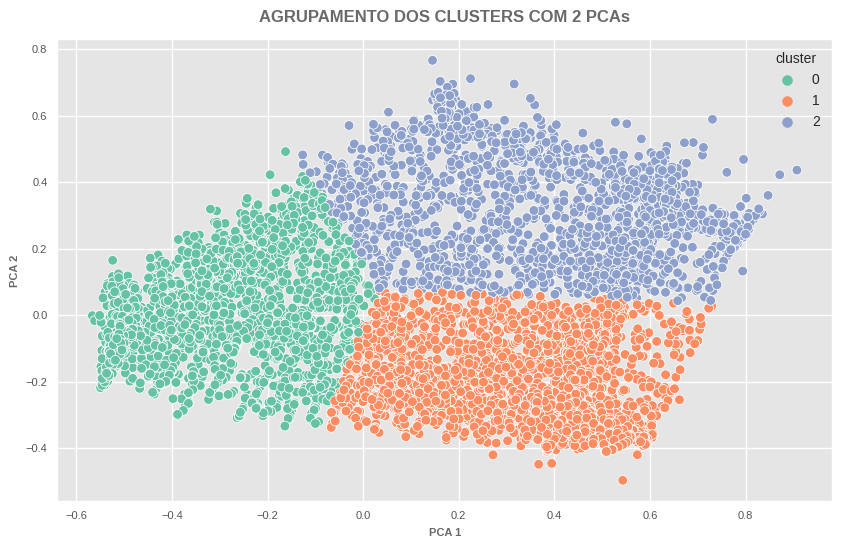

In [69]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_kmn, palette = 'Set2')
plt.title('AGRUPAMENTO DOS CLUSTERS COM 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [72]:
# Modelo K-Means final

# Métricas
metricas = []

kmeans = KMeans(n_clusters= 3, random_state = 18)
pred = kmeans.fit_predict(df_pca1)

modelo = 'K-Means'
n_clusters = 3
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metricas.append((modelo, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_kmn = pd.DataFrame(metricas, columns=['Modelo', 'N° Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_kmn

Modelo  N° Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
0  K-Means            3    0.431311        6827.227169        1.131881

# 5. DBSCAN

O algoritmo DBSCAN define clusters baseado em densidade, isto é, a distância entre os pontos. O parâmetro eps é a distância máxima que um ponto pode estar de outro ponto para que os dois pontos possam ser considerados parte do mesmo cluster. Quanto maior o valor de eps, mais pontos serão incluídos em um cluster e, portanto, os clusters serão mais amplos. Por outro lado, quanto menor o valor de eps menos pontos serão incluídos em um cluster e, portanto, os clusters serão mais estreitos.

A distância entre os pontos mais próximos pode ser usada como uma estimativa para o valor de eps. Isso é onde entra o NearestNeighbors, um algoritmo de aprendizado não supervisionado que pode ser usado para calcular as distâncias entre os k vizinhos mais próximos de cada ponto. Ao plotar essas distâncias em ordem crescente, é possível ver o ponto onde o gráfico começa a crescer rapidamente, o que indica que os clusters estão se formando. Esse ponto pode ser usado como uma estimativa para o valor de eps.

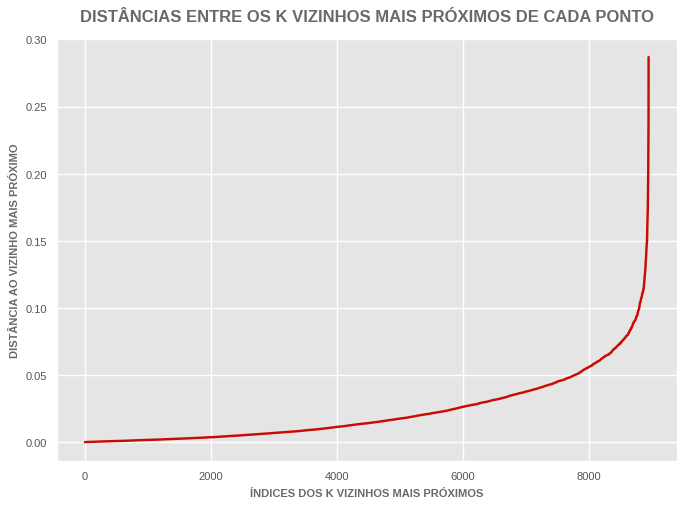

In [166]:
# NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2).fit(df_pca1)

# Calculando as distâncias e os índices dos k vizinhos mais próximos
distances, indices = nbrs.kneighbors(df_pca1)

# Plot
plt.plot(sorted(distances[:,1]), 'r-')
plt.title('DISTÂNCIAS ENTRE OS K VIZINHOS MAIS PRÓXIMOS DE CADA PONTO', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('ÍNDICES DOS K VIZINHOS MAIS PRÓXIMOS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('DISTÂNCIA AO VIZINHO MAIS PRÓXIMO', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

Neste exemplo, o objeto NearestNeighbors é usado para calcular as distâncias entre os pontos mais próximos. O gráfico gerado mostra essas distâncias ordenadas, permitindo a escolha de um valor de eps adequado. O ponto onde o gráfico começa a crescer rapidamente é um bom candidato para o valor de eps, pois indica que os clusters estão se formando. Deste modo, podemos perceber que o valor de eps onde o ocorre a crescimento do gráfico é com o valor de 0.05.

Entretanto, é importante considerar que o valor de min_samples interage com o valor de eps, então é necessário testar diferentes combinações de valores de eps e min_samples, vamos utilizar o GridSearchCV para encontrar a melhor combinação entre estes dois parâmetros.

In [74]:
# Define o espaço de busca de parâmetros
param_grid = {'eps':[0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10], 'min_samples':[2,5,10, 20, 30, 40, 50, 60, 70]}

# Cria o objeto DBSCAN
dbscan = DBSCAN()

# Cria o objeto GridSearchCV
grid_search = GridSearchCV(dbscan, param_grid, scoring=silhouette_score)

# Executa a busca de grade
grid_search.fit(df_pca1)

# Exibe os melhores parâmetros encontrados
print("Melhores parâmetros encontrados: ", grid_search.best_params_)

Melhores parâmetros encontrados:  {'eps': 0.01, 'min_samples': 2}
CPU times: user 45.5 s, sys: 0 ns, total: 45.5 s
Wall time: 45.5 s


In [75]:
# Instancia do DBSCAN
dbscan = DBSCAN(eps=0.01, min_samples=2).fit(df_pca1)

# obtendo os rótulos dos clusters
labels = dbscan.labels_

In [76]:
# Número de clusters em rótulos, ignorando o ruído, se presente
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de pontos de ruído: %d" % n_noise_)

Número estimado de clusters: 607
Número estimado de pontos de ruído: 5173


Número de clusters inconcebível para se realizar uma análise de segmentação.

Vamos verificar as melhores combinações de eps e min_samples através de um loop aninhado.

In [77]:
# Avalição das métricas para diversos valores diferentes de clusters

# Métricas

eps =[]
min_samples = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
n_clusters = []
metricas_dbscan = []

for eps in np.linspace(0.01,0.10, num=5):
    for min_sample in range(2, 60, 5):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(df_pca1)
        pred = dbscan.labels_

        silhouette = silhouette_score(df_pca1, pred)
        calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
        davies_bouldin = davies_bouldin_score(df_pca1, pred)
        metricas_dbscan.append((eps, min_sample, silhouette, calinski_harabasz, davies_bouldin, len(set(dbscan.labels_))) )

df_dbscan = pd.DataFrame(metricas_dbscan, columns=['eps', 'min_samples', 'silhouette', 'calinski_harabasz', 'davies_bouldin', 'number_of_clusters'])
df_dbscan.sort_values('silhouette', ascending=False).head(10)

CPU times: user 2min 7s, sys: 1min 38s, total: 3min 45s
Wall time: 1min 51s


eps  min_samples  silhouette  calinski_harabasz  davies_bouldin  \
46  0.0775           52    0.160683        1925.648615        1.365359   
55  0.1000           37    0.104890         416.732471        1.865837   
56  0.1000           42    0.103872         423.532283        1.858772   
57  0.1000           47    0.103200         428.275735        1.852370   
45  0.0775           47    0.079085         658.138477        2.073393   
58  0.1000           52    0.078401         399.019226        1.634520   
59  0.1000           57    0.077118         485.435528        1.801495   
50  0.1000           12    0.060234         135.716906        1.784752   
44  0.0775           42    0.057780         502.188111        1.742273   
43  0.0775           37    0.055484         395.452513        1.569016   

    number_of_clusters  
46                   5  
55                   4  
56                   4  
57                   4  
45                   3  
58                   5  
59                   4  
50                   5  
44                   4  
43                   5

A melhor combinação foi eps=0.0775 e min_samples = 52.

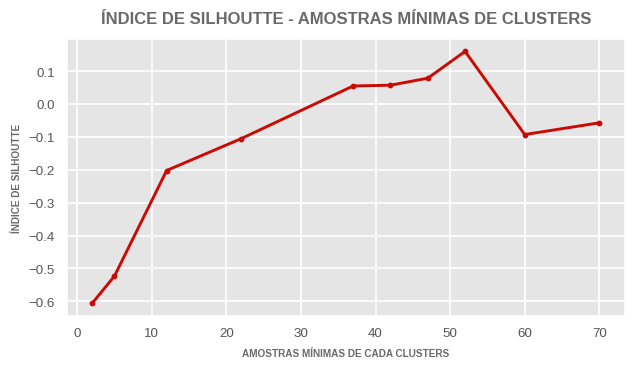

In [168]:
# Plot 

silhoutte_coefs = []

for min_points in [2, 5, 12, 22, 37, 42, 47, 52, 60, 70]:
    db = DBSCAN(eps = 0.0775, min_samples = min_points)
    db.fit(df_pca1)
    silhoutte_coefs.append(metrics.silhouette_score(df_pca1, db.labels_))
    
plt.figure(figsize = (6, 3), dpi = 120)
plt.plot([2, 5, 12, 22, 37, 42, 47, 52, 60, 70], silhoutte_coefs, color = 'r', marker = '.')
plt.title('ÍNDICE DE SILHOUTTE - AMOSTRAS MÍNIMAS DE CLUSTERS', fontsize = 9, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('AMOSTRAS MÍNIMAS DE CADA CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 6)
plt.ylabel('ÍNDICE DE SILHOUTTE', color = 'dimgrey', fontweight = 'bold', fontsize = 6)
plt.show();

In [79]:
dbscan = DBSCAN(eps=0.0775, min_samples=52).fit(df_pca1)

# Obtendo os rótulos dos clusters
dbscan_labels = dbscan.labels_

In [80]:
# Número de clusters em rótulos, ignorando o ruído, se presente
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)
print("Número estimado de clusters: %d" % n_clusters_)
print("Número estimado de pontos de ruído: %d" % n_noise_)

Número estimado de clusters: 4
Número estimado de pontos de ruído: 3937


Vamos verificar a distribuição dos clusters com as features mais elementares para o problema de negócio.

In [81]:
# Cópia do Dataframe original
df_bscan = df.copy()

In [82]:
# Anexar o resultado dos clusters do DBSCAN ao Dataframe
df_bscan['cluster'] = dbscan_labels

In [83]:
# Quantidade de cada clusters
df_bscan['cluster'].value_counts()

-1    3937
 1    3257
 2    1583
 0     104
 3      68
Name: cluster, dtype: int64

OBS: O valor de -1 representa amostras que não foram atribuídas a nenhum cluster.

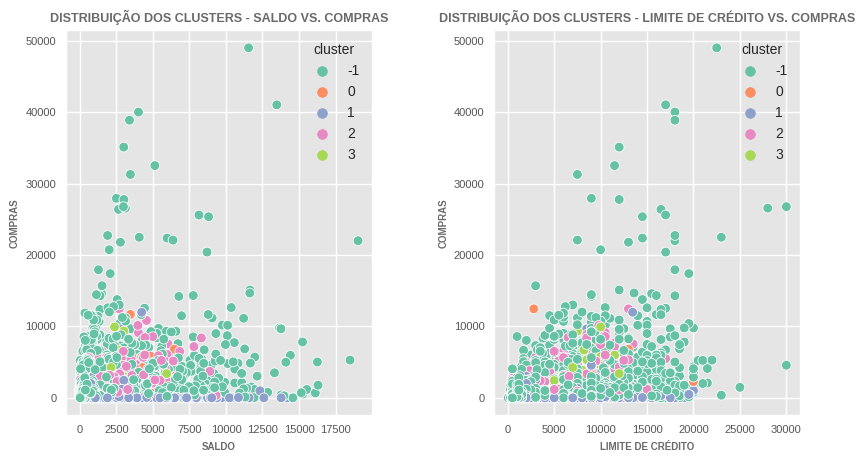

In [84]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_bscan, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_bscan, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

In [87]:
# Cópia do Dataframe com 2 PCAs
df_pca2_db = df_pca2.copy()

In [88]:
# Dataframe para dois componentes
df_pca2_db = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Anexa os rótulos dos clusters ao Dataframe
df_pca2_db = pd.concat([df_pca2_db, pd.DataFrame({'cluster':dbscan_labels})], axis=1)

In [89]:
# Tabela com 2 PCAs
df_pca2_db.head()

pca1      pca2  cluster
0 -0.323287 -0.093937       -1
1 -0.448162 -0.030871        1
2  0.176913  0.629412        0
3 -0.411648  0.028061        1
4 -0.397398  0.023580        1

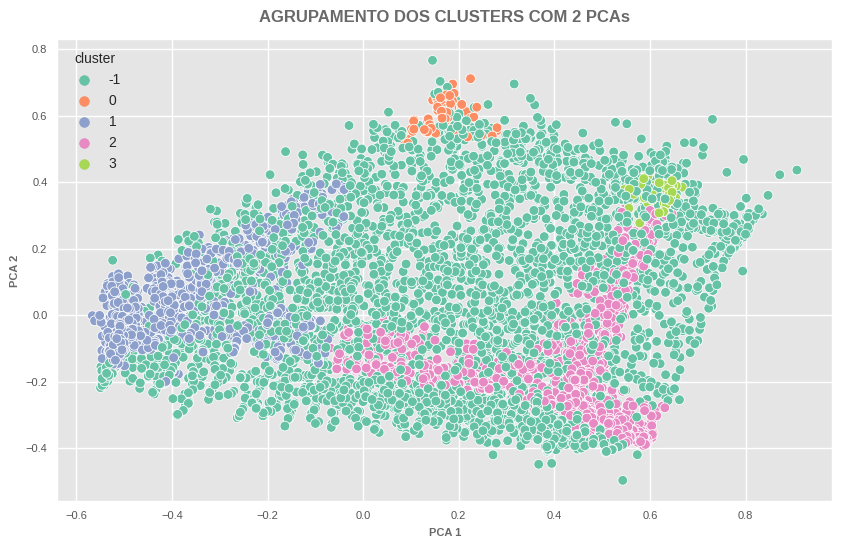

In [91]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_db, palette = 'Set2')
plt.title('AGRUPAMENTO DOS CLUSTERS COM 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

Percebe-se que o algoritmo DBSCAN é melhor em detectar outliers.

In [92]:
# Modelo DBSCAN final

# Métricas
metricas = []

#dbscan = DBSCAN(eps=0.0775, min_samples=52)
dbscan = DBSCAN(eps=0.0775, min_samples=52).fit(df_pca1)

# obtendo os rótulos dos clusters
#dbscan_labels = dbscan.labels_
pred = dbscan.labels_

modelo = 'DBSCAN'
n_clusters = 4
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metricas.append((modelo, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_db = pd.DataFrame(metricas, columns=['Modelo', 'N° Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_db

Modelo  N° Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
0  DBSCAN            4    0.160683        1925.648615        1.365359

# 6. Hierarchical Clustering

Uma maneira simples e intuitiva de determinar o número de clusters em um agrupamento hierárquico é traçar uma linha horizontal ao longo do dendrograma e dividir em um número específico de seções, cada uma representando um cluster.

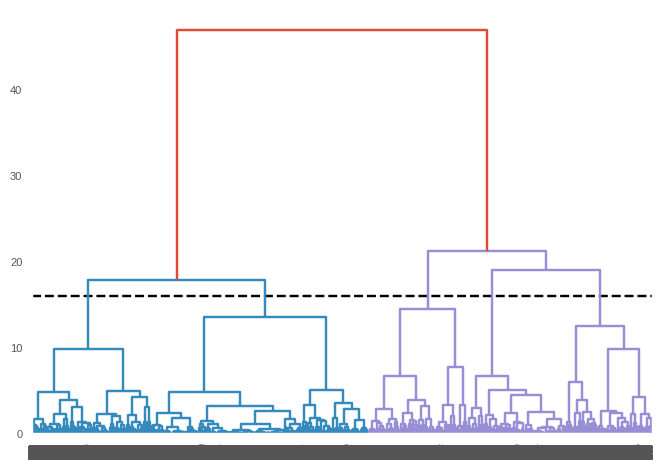

CPU times: user 4min 10s, sys: 10.7 s, total: 4min 21s
Wall time: 4min 22s


In [94]:
dend = linkage(df_pca1, 'ward')
plt.axhline(y=16, color='black', linestyle='--')
dendrogram(dend)
plt.show();

Através do Dendograma 5 clusters parece ser uma escolha razoável. Entretanto, vamos verificar outras métricas de agrupamento.

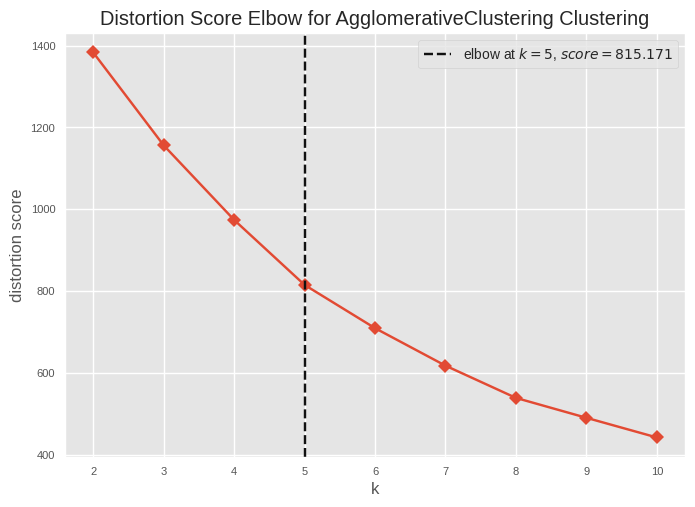

In [95]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

O Método "cotovelo" também indicou 5 como o número ideal de clusters.

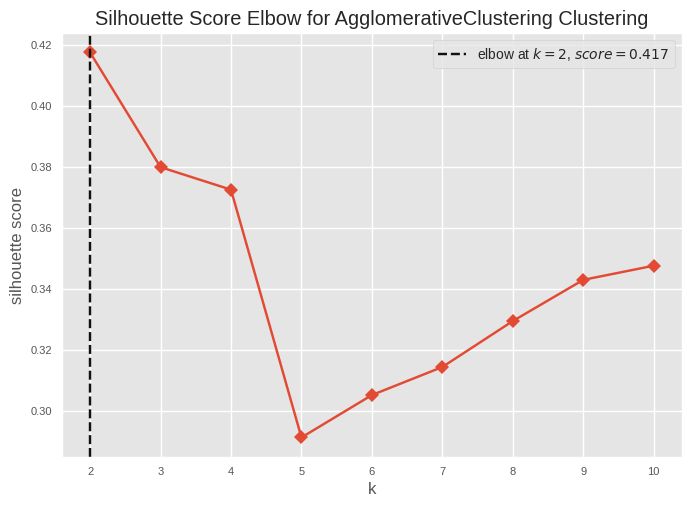

In [96]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='silhouette', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

Mediante o índice de Silhoutte, 2 clusters apresenta-se como sendo o melhor resultado e surpreendentemente, diferente das outras duas outras métricas anteriores, 5 clusters afigurou-se como a pior escolha.

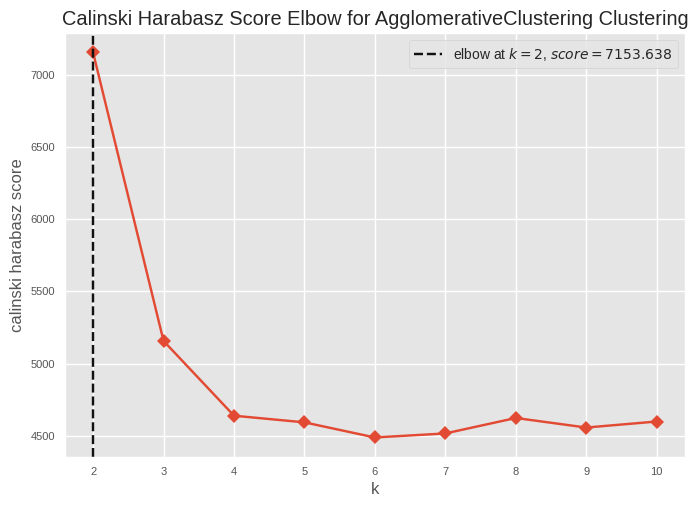

In [97]:
# Plot

visualizer = KElbowVisualizer(AgglomerativeClustering(), metric='calinski_harabasz', timings=False)
visualizer.fit(df_pca1)
visualizer.show()
plt.show();

O índice de Calinski-Harabasz também assinala o melhor resultado como sendo igual a 2 clusters.

Vamos conferir por meio de uma tabela todas as métricas (incluindo o índice de Davies-Bouldin) de 2 a 10 clusters.

In [98]:
# Avalição das métricas para diversos valores diferentes de clusters

# Métricas

n_clusters = []
silhouette = []
calinski_harabasz = []
davies_bouldin = []
inertia = []

for n_cluster in range(2, 11):
    ac = AgglomerativeClustering(n_clusters=n_cluster)
    pred = ac.fit_predict(df_pca1)

    silhouette.append(silhouette_score(df_pca1, pred))
    calinski_harabasz.append(calinski_harabasz_score(df_pca1, pred))
    davies_bouldin.append(davies_bouldin_score(df_pca1, pred))
    inertia.append(kmeans.inertia_)
    n_clusters.append(n_cluster)
    
# Resultados
    
result = pd.DataFrame({
    'Clusters': n_clusters,
    'Silhouette': silhouette,
    'Calinski Harabasz': calinski_harabasz,
    'Davies Bouldin': davies_bouldin})

result.sort_values('Silhouette', ascending=False)

Clusters  Silhouette  Calinski Harabasz  Davies Bouldin
0         2    0.417459        7153.638491        1.030964
1         3    0.379865        5156.439859        1.317517
2         4    0.372482        4638.606194        1.117199
8        10    0.347565        4598.444426        1.004862
7         9    0.342922        4556.663339        1.054034
6         8    0.329422        4622.830768        1.041481
5         7    0.314361        4515.833397        1.043774
4         6    0.305166        4487.907964        1.124842
3         5    0.291257        4592.553055        1.220793

Agora podemos ratificar de maneira evidente que 2 clusters realmente apresentam os melhores valores. Apesar disso, o algoritmo K-Means ostenta um resultado superior de agrupamento.

In [99]:
# Cria um modelo de agrupamento hierárquico
hc = AgglomerativeClustering(n_clusters=2)

# Ajusta o modelo aos dados
hc.fit(df_pca1)

# Imprime os rótulos de cada exemplo
hc_labels = hc.labels_

In [100]:
# Cópia do Dataframe original
df_hc = df.copy()

In [101]:
# Anexar o resultado dos clusters do agrupamento hierárquico ao Dataframe
df_hc['cluster'] = hc_labels

In [102]:
# Quantidade de cada clusters
df_hc['cluster'].value_counts()

1    4860
0    4089
Name: cluster, dtype: int64

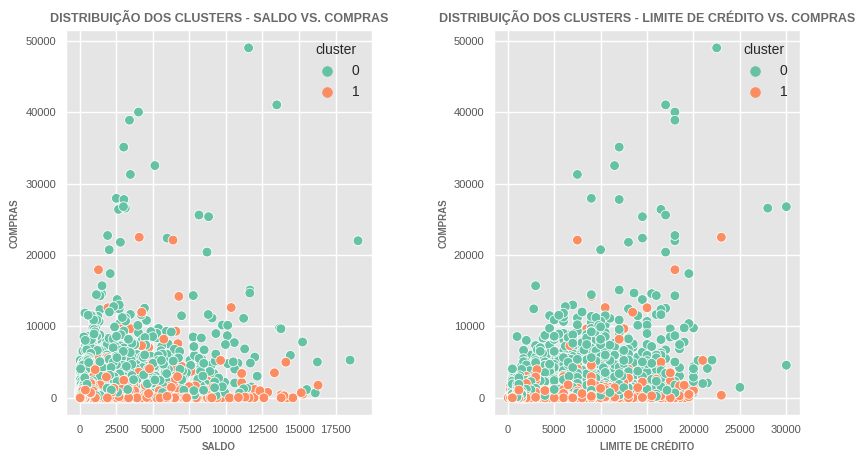

In [103]:
# Plot

plt.figure(figsize=(15,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 3, 1)
sns.scatterplot(data=df_hc, x='BALANCE', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - SALDO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('SALDO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 3, 2)
sns.scatterplot(data=df_hc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster', palette = 'Set2')
plt.title('DISTRIBUIÇÃO DOS CLUSTERS - LIMITE DE CRÉDITO VS. COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('LIMITE DE CRÉDITO', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

In [104]:
# Cópia do Dataframe com 2 PCAs
df_pca2_db = df_pca2.copy()

In [105]:
# Dataframe para dois componentes
df_pca2_hc = pd.DataFrame(data = df_pca2, columns = ['pca1', 'pca2'])

# Anexa os rótulos dos clusters ao Dataframe
df_pca2_hc = pd.concat([df_pca2_hc, pd.DataFrame({'cluster':hc_labels})], axis=1)

In [106]:
# Tabela com 2 PCAs
df_pca2_hc.head()

pca1      pca2  cluster
0 -0.323287 -0.093937        1
1 -0.448162 -0.030871        1
2  0.176913  0.629412        0
3 -0.411648  0.028061        1
4 -0.397398  0.023580        1

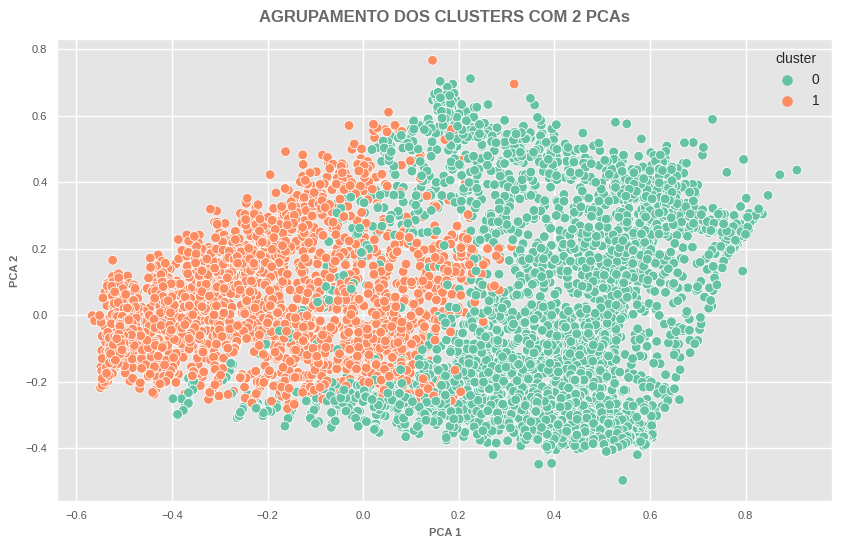

In [108]:
# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=df_pca2_hc, palette = 'Set2')
plt.title('AGRUPAMENTO DOS CLUSTERS COM 2 PCAs', fontsize = 12, color ='dimgrey', fontweight = 'bold', y=1.02)
plt.xlabel('PCA 1', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 8)
plt.ylabel('PCA 2', color = 'dimgrey', fontweight = 'bold', fontsize = 8)
plt.show();

In [109]:
# Modelo Hierarchical Clustering final

# Métricas
metricas = []

hc = AgglomerativeClustering(n_clusters=2)
pred = hc.fit_predict(df_pca1)

modelo = 'Hierarchical Clustering'
n_clusters = 2
silhouette = silhouette_score(df_pca1, pred)
calinski_harabasz = calinski_harabasz_score(df_pca1, pred)
davies_bouldin = davies_bouldin_score(df_pca1, pred)

metricas.append((modelo, n_clusters, silhouette, calinski_harabasz, davies_bouldin))

df_hc = pd.DataFrame(metricas, columns=['Modelo', 'N° Clusters', 'Silhouette', 'Calinski Harabasz', 'Davies Bouldin'])

df_hc

Modelo  N° Clusters  Silhouette  Calinski Harabasz  \
0  Hierarchical Clustering            2    0.417459        7153.638491   

   Davies Bouldin  
0        1.030964

Vamos comparar as métricas de todos os algoritmos.

In [110]:
# Tabela de comparação entre os algoritmos 
df_comp = pd.concat([df_kmn, df_db, df_hc])
df_comp.sort_values('Silhouette', ascending=False)

Modelo  N° Clusters  Silhouette  Calinski Harabasz  \
0                  K-Means            3    0.431311        6827.227169   
0  Hierarchical Clustering            2    0.417459        7153.638491   
0                   DBSCAN            4    0.160683        1925.648615   

   Davies Bouldin  
0        1.131881  
0        1.030964  
0        1.365359

Com base não só no resultado das métricas mas também na interpretação dos gráficos de distribuição dos clusters, o algoritmo K-Means com 3 clusters me parece ser a escolha mais plausível para o problema de segmentação de clientes de cartão de crédito.

# 7. Interpretação dos Clusters

In [129]:
# Anexar o resultado final dos clusters ao Dataframe original
df['cluster'] = labels2

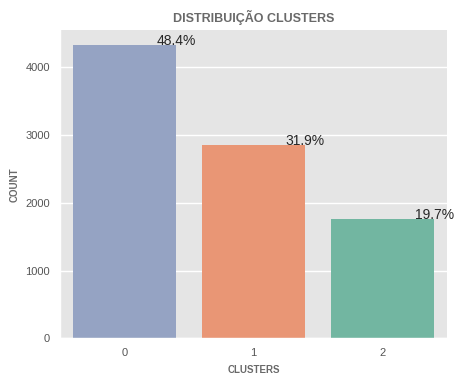

In [165]:
# Plot

plt.figure(figsize=(5,4))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

total = float(df.shape[0])
cores=['#8da0cb', '#fc8d62', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
ax = sns.countplot(x='cluster', data=df, order = df['cluster'].value_counts().index)
sns.despine()
plt.title('DISTRIBUIÇÃO CLUSTERS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COUNT', color = 'dimgrey', fontweight = 'bold', fontsize = 7)
plt.show();

Para uma interpretação mais significativa vamos avaliar o resultado dos clusters em escala e distribuição originais.

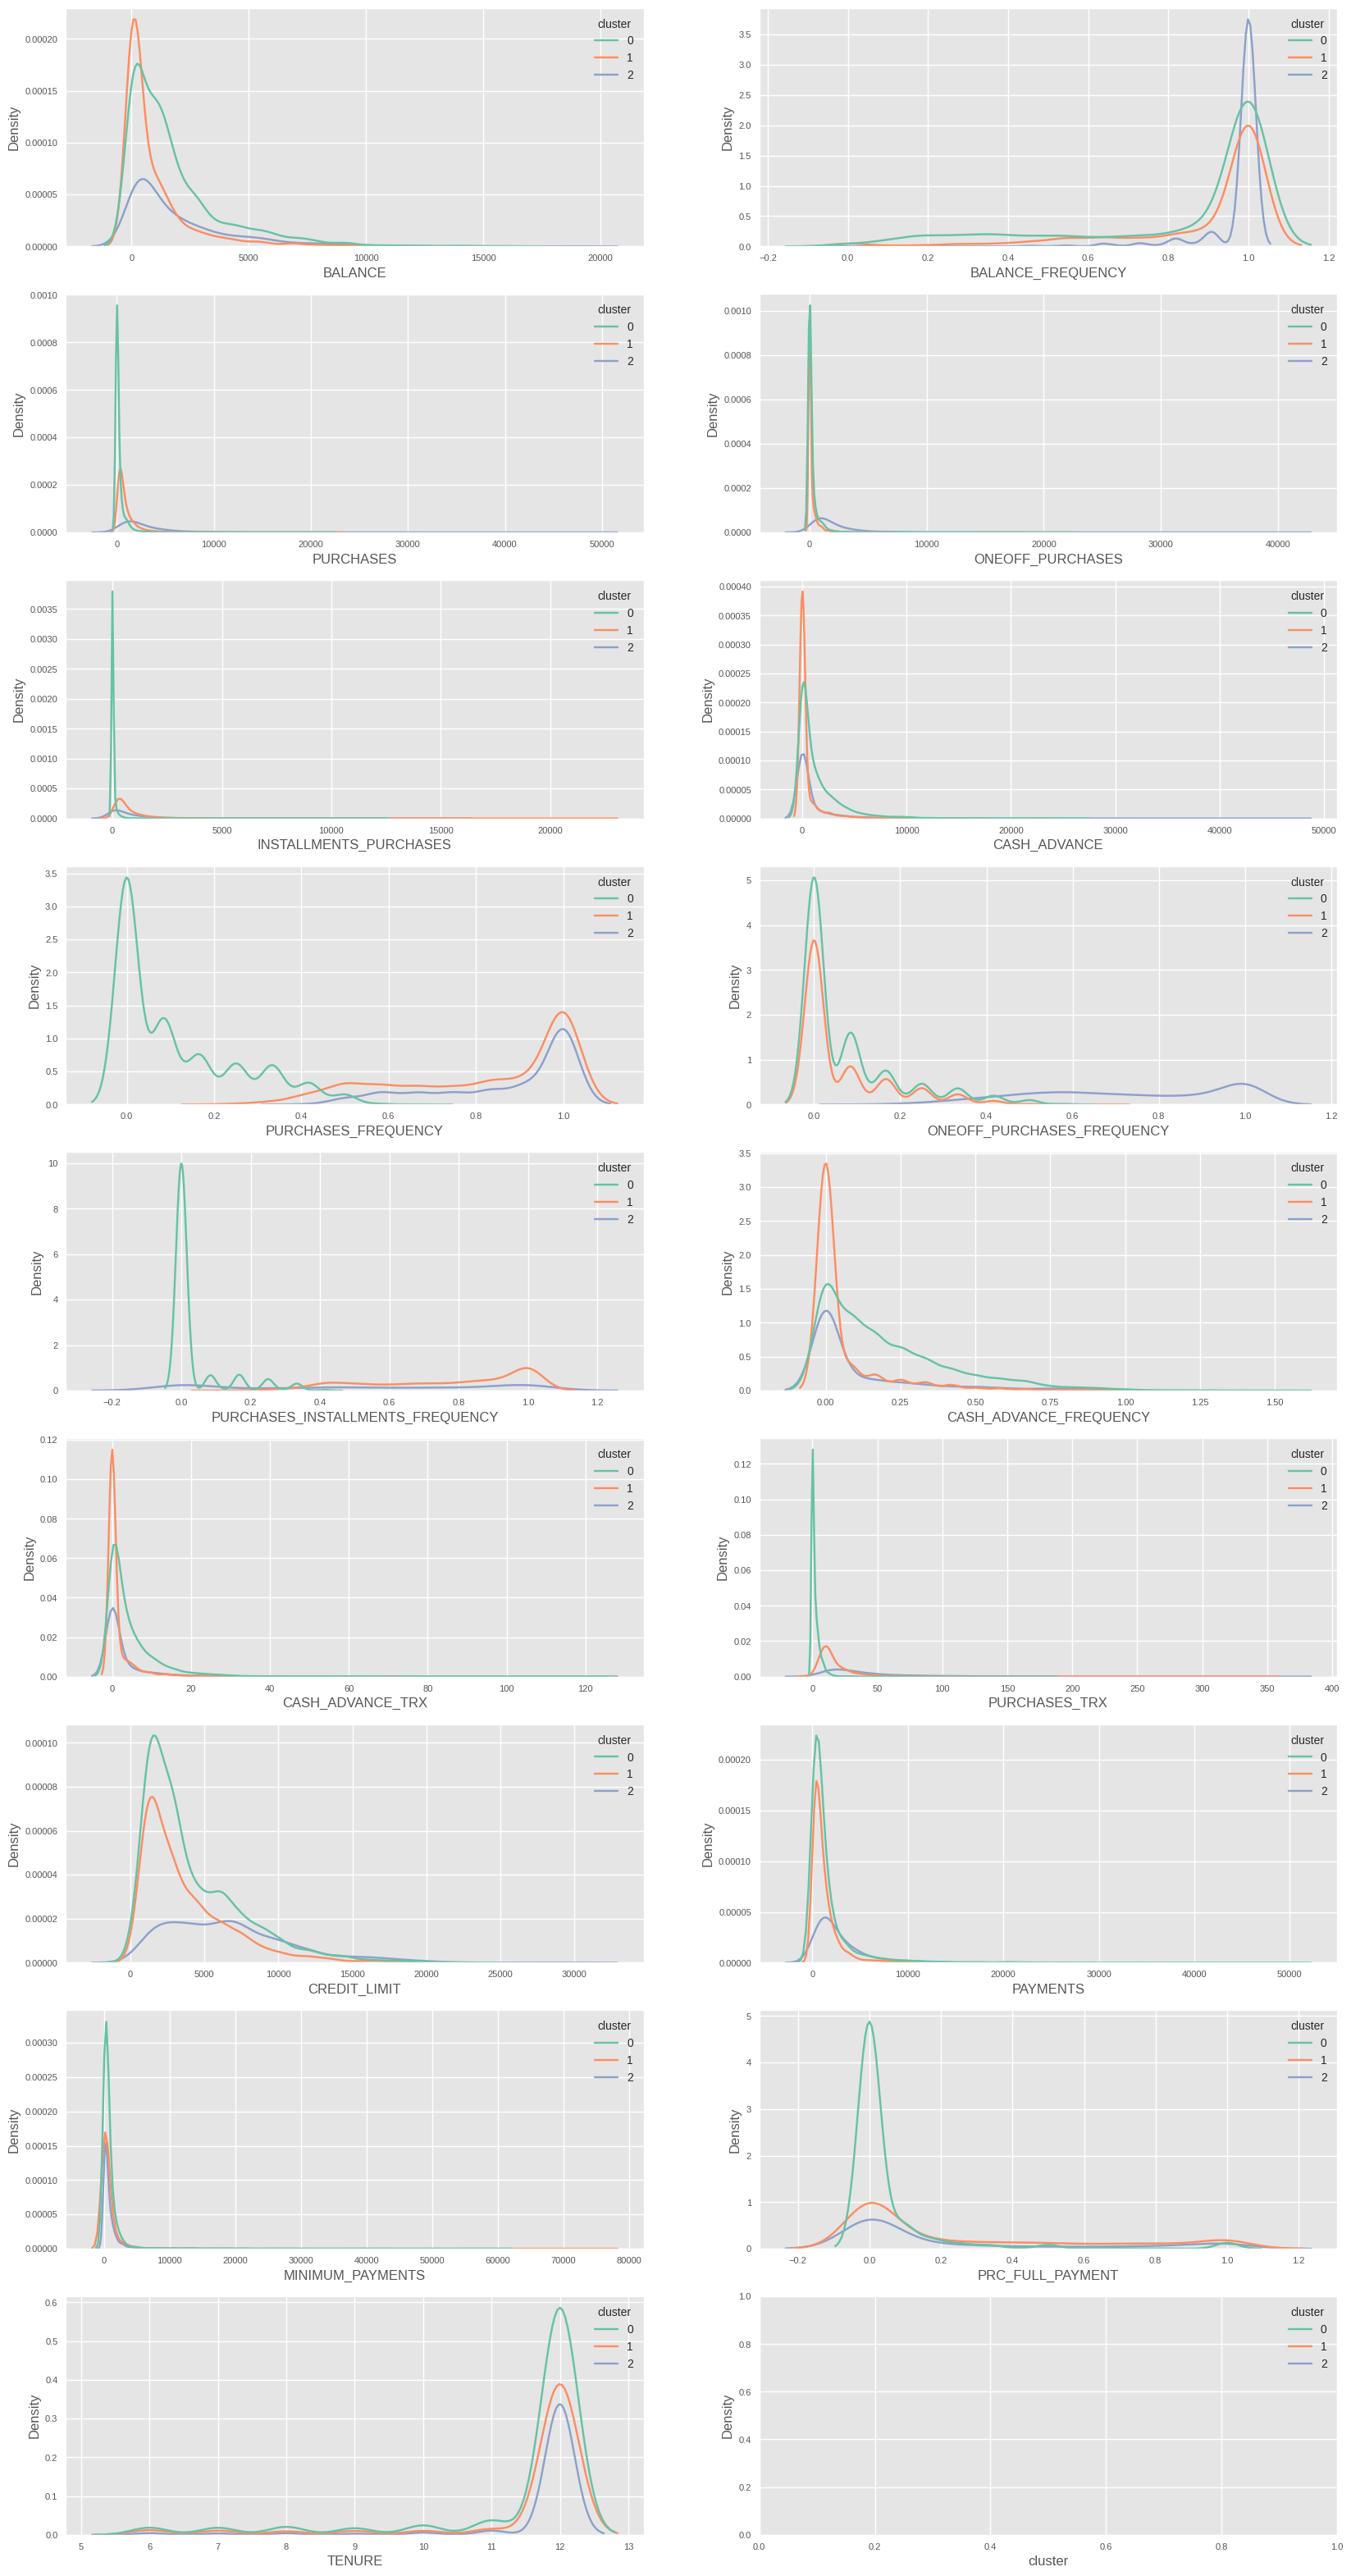

In [130]:
# Plotagem das colunas por clusters
plt.figure(figsize = (20,40))
x = 1
for d in df:
    plt.subplot(9, 2, x)
    sns.kdeplot(data=df, x=d, hue='cluster', palette='Set2')
    x += 1

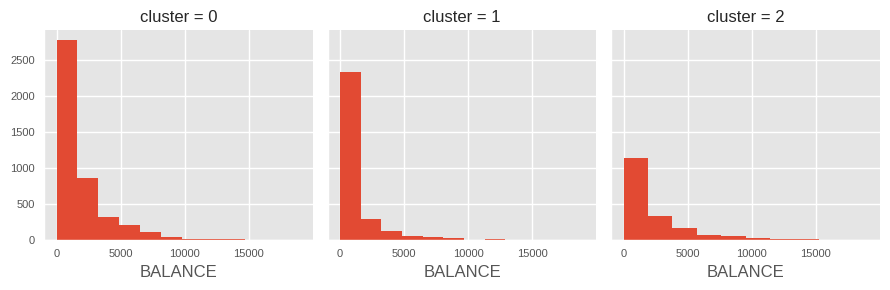

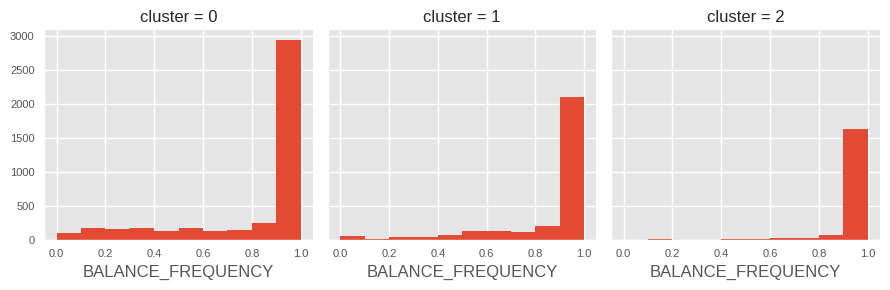

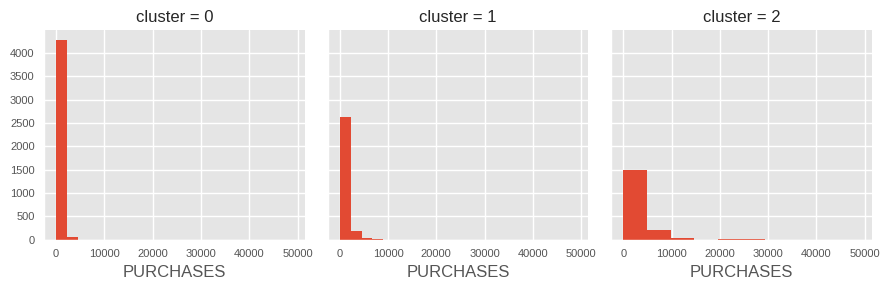

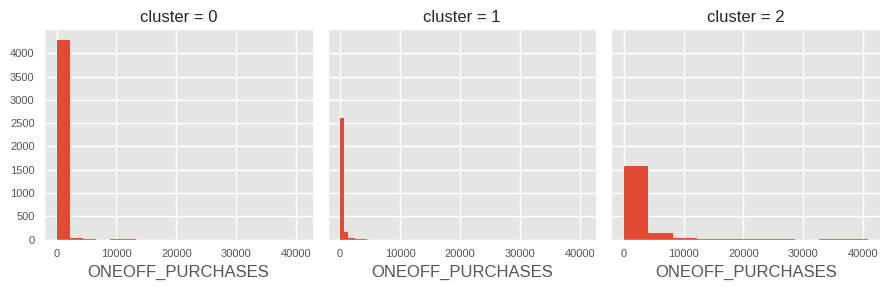

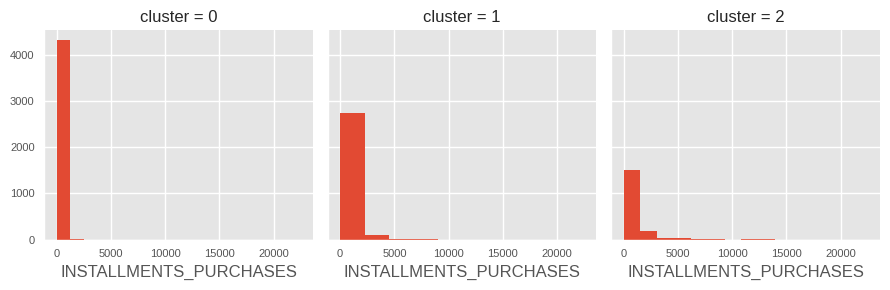

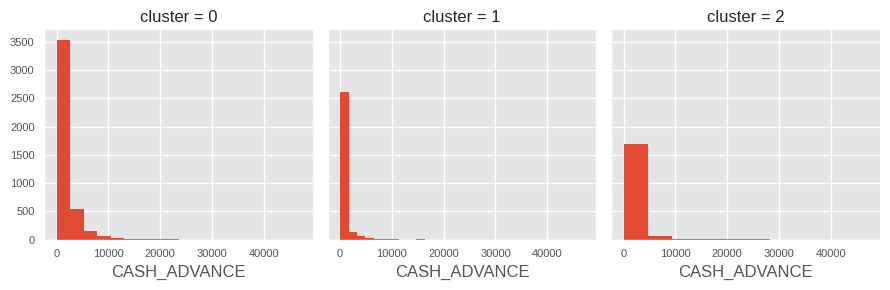

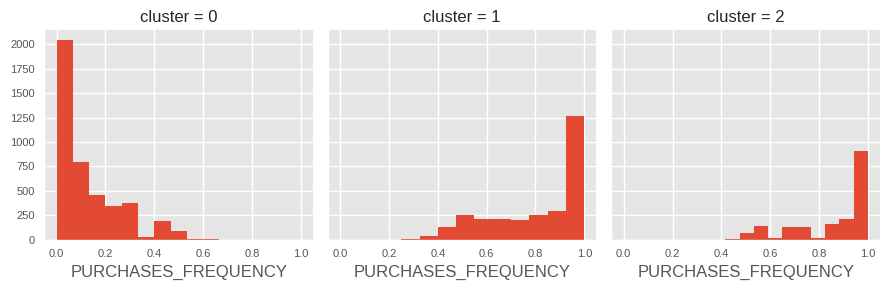

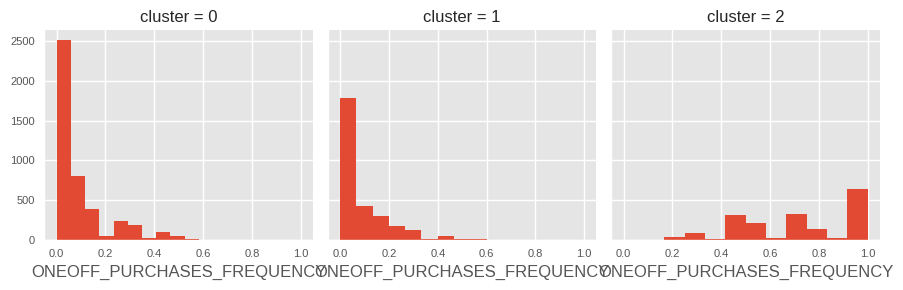

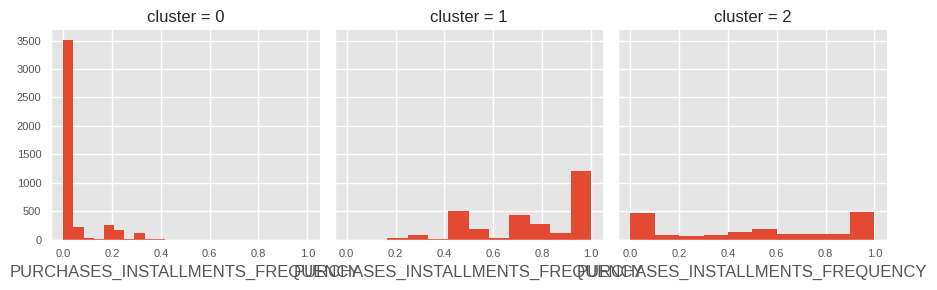

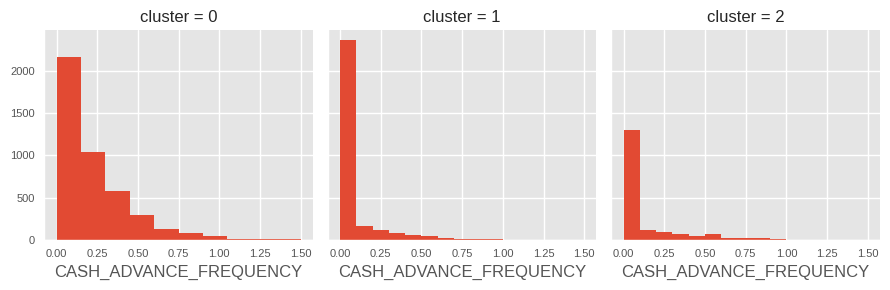

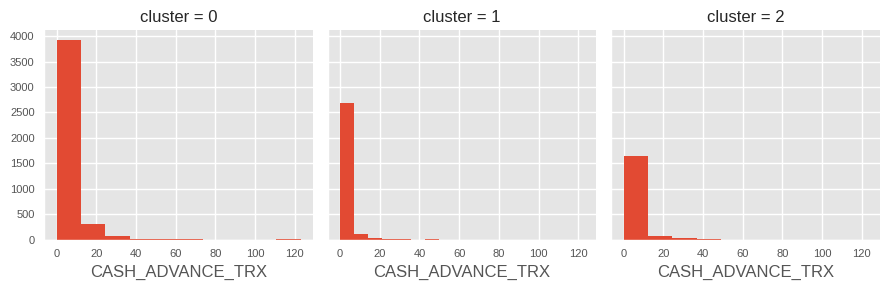

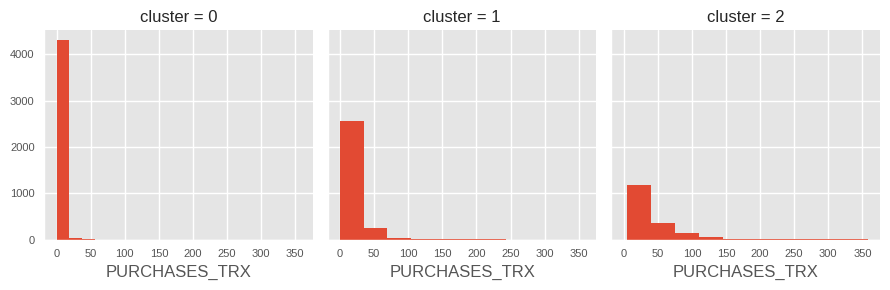

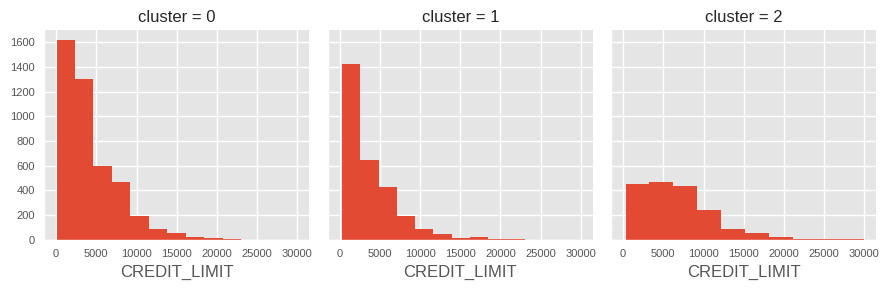

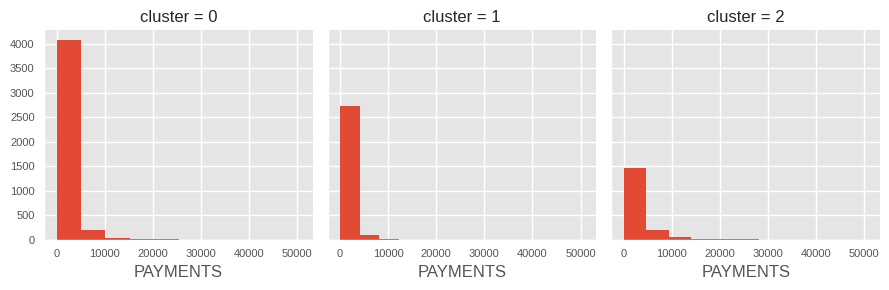

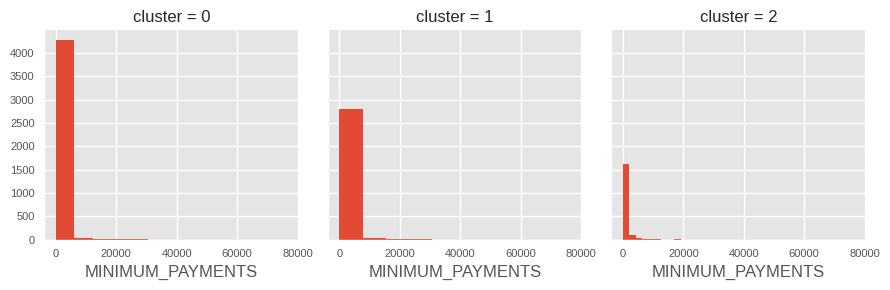

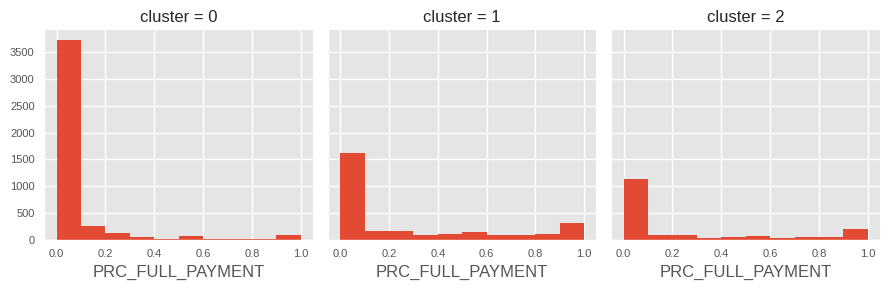

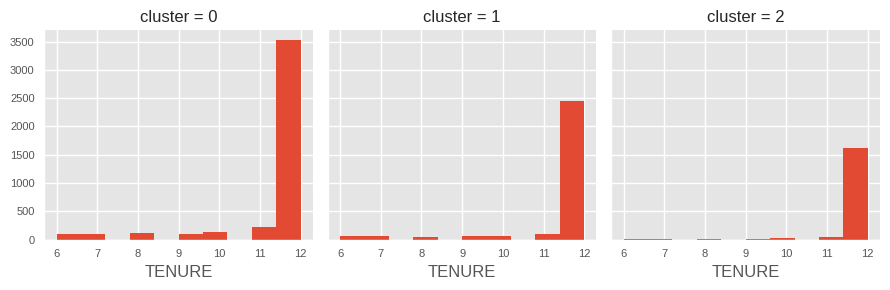

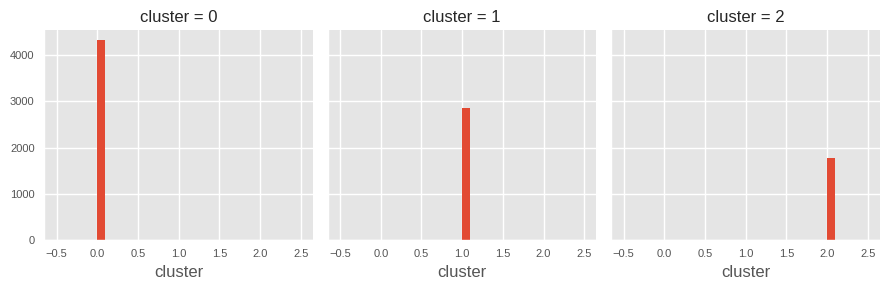

In [131]:
# Distribuição dos Clusters por colunas
for c in df:
    grid= sns.FacetGrid(df, col='cluster')
    grid.map(plt.hist, c)

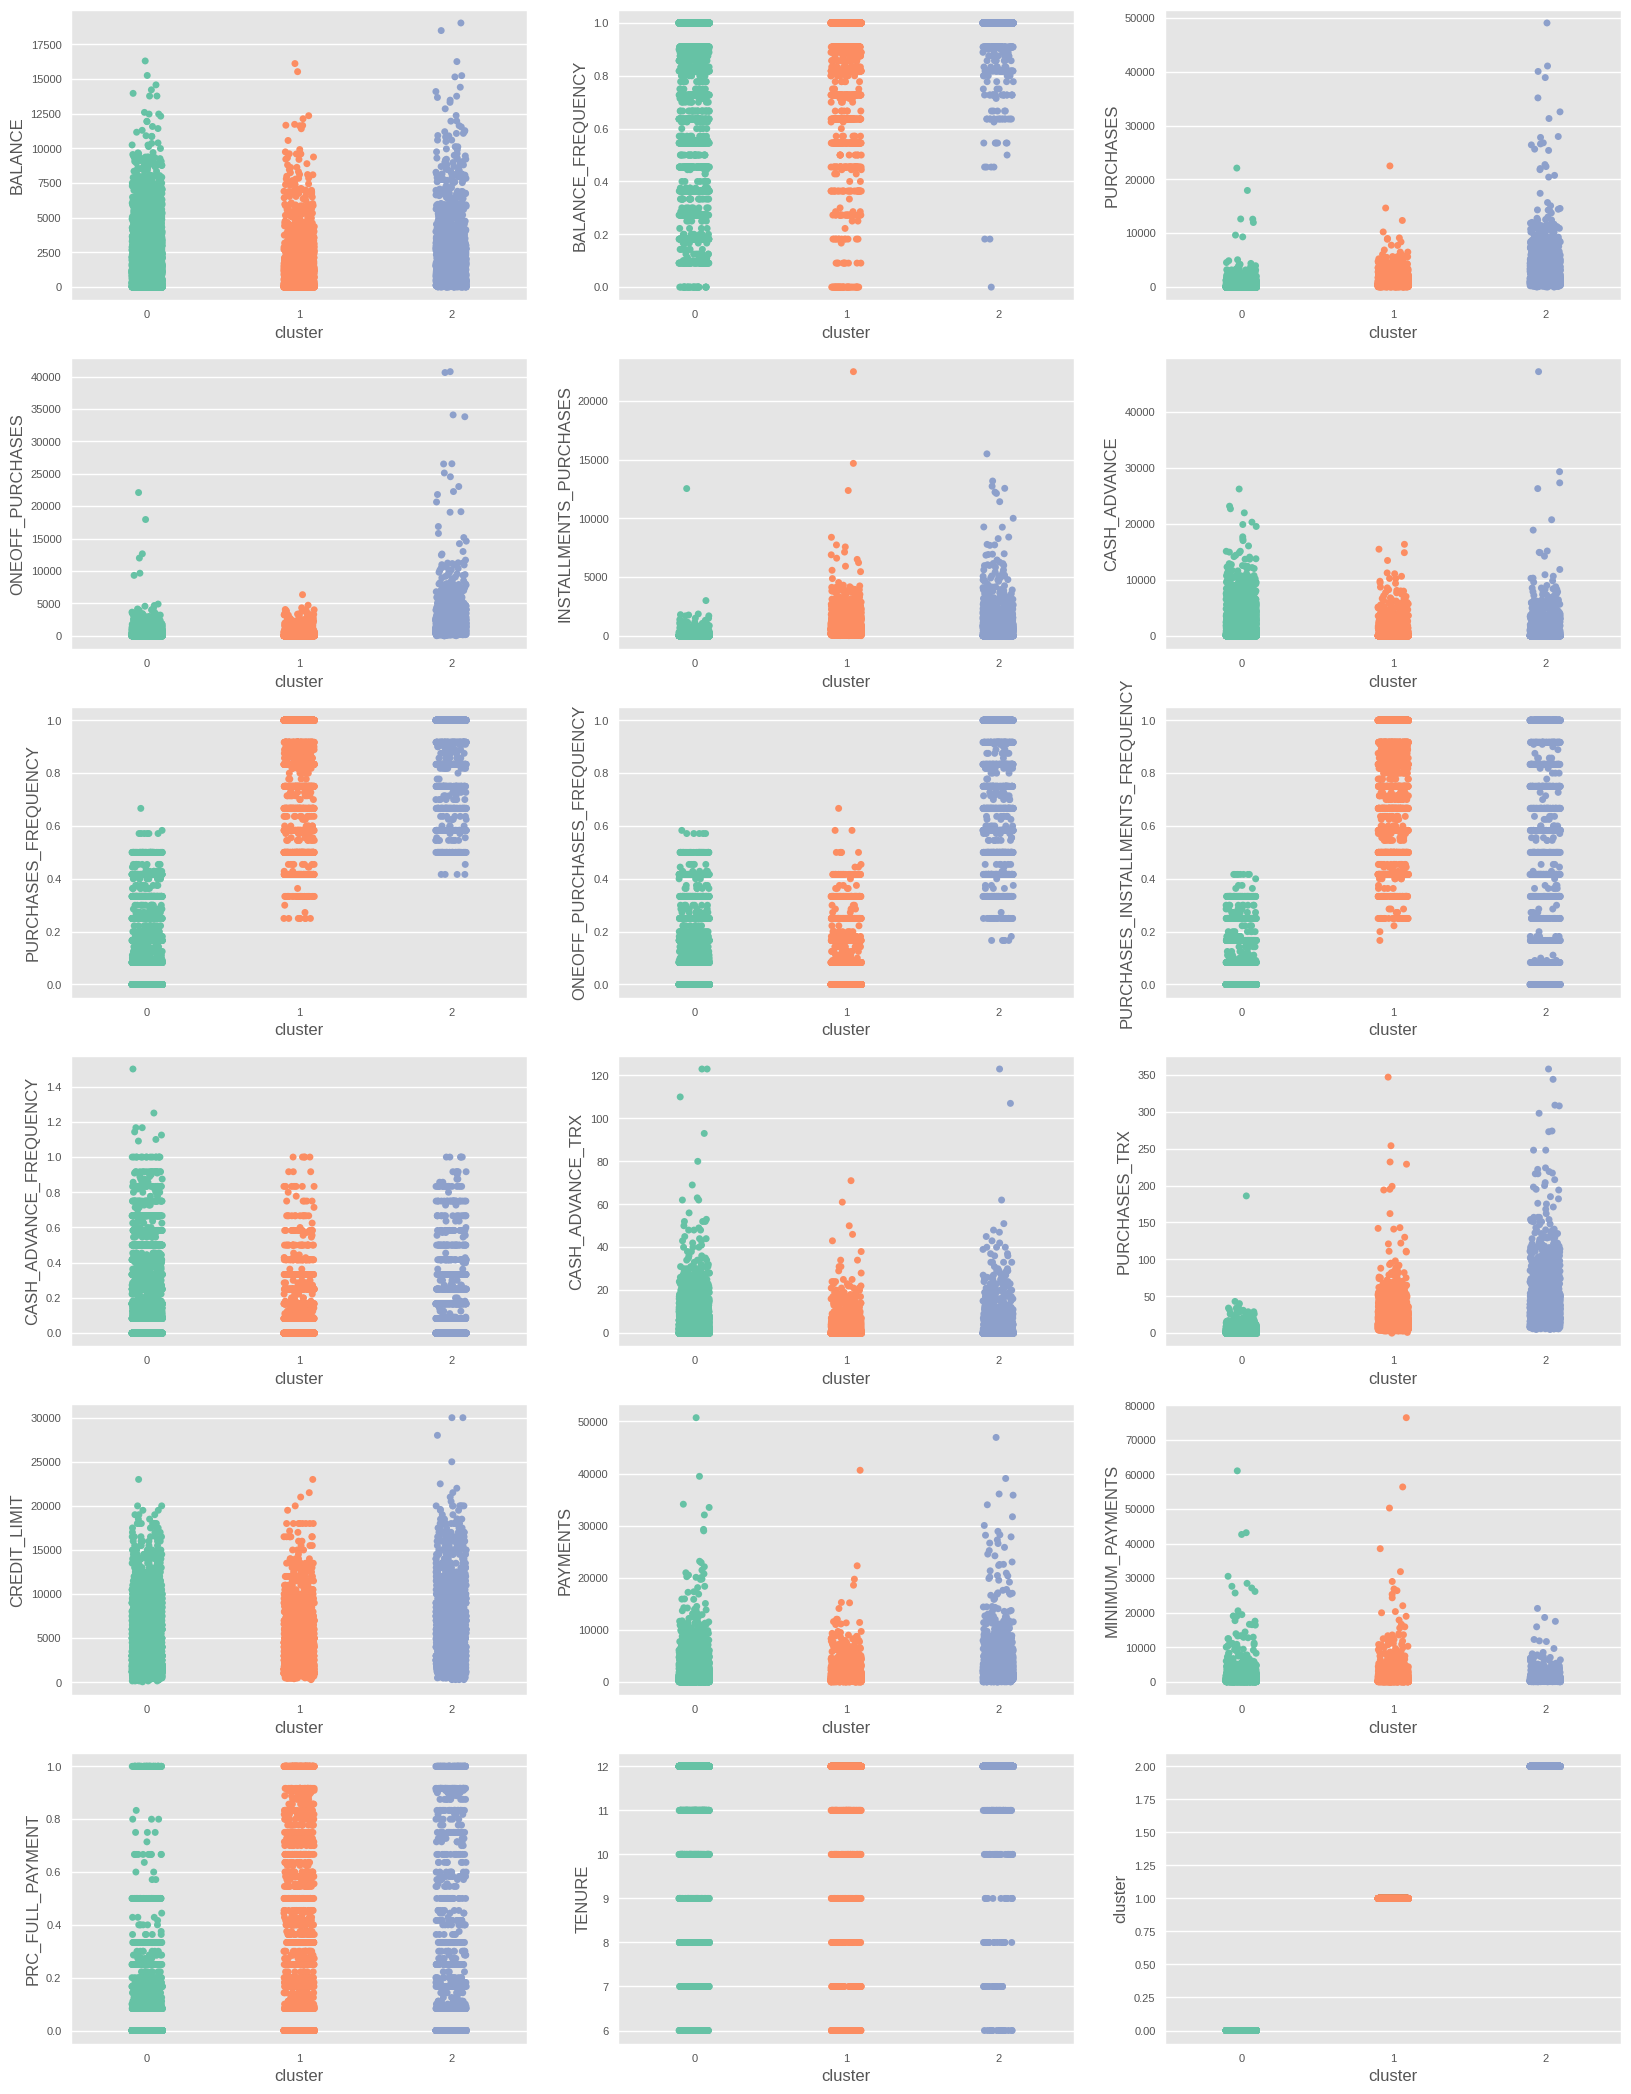

In [133]:
# Plotagem dos clusters por colunas 
plt.figure(figsize = (20,40))
x = 1
for d in df:
    plt.subplot(9, 3, x)
    sns.stripplot(data=df, x ='cluster', y=d, palette='Set2')
    x += 1

Saldo médio em cartão de crédito se refere ao montante médio de dívida que o usuário tem em seu cartão de crédito. É calculado dividindo o saldo total do cartão pelo número de dias no período de faturamento. O saldo médio pode ser usado para avaliar a capacidade de pagamento do cliente.

Saldo total em cartão de crédito se refere ao valor total da dívida que o usuário tem em seu cartão de crédito. É a soma de todas as compras e saques feitos com o cartão mais os juros e encargos aplicados. O saldo total pode ser usado para avaliar a capacidade de endividamento do cliente.

Em resumo, o saldo médio é o valor da dívida dividido pelo período, enquanto o saldo total é o valor da dívida total acumulado.

**SALDO**

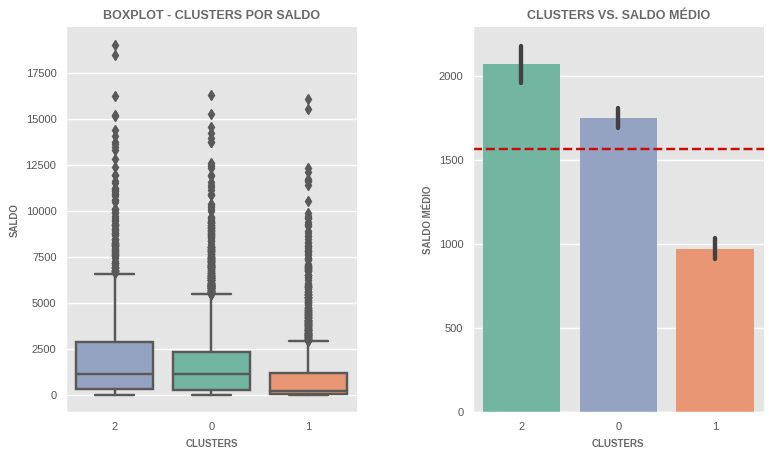

In [134]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='BALANCE', order = df.groupby(['cluster'])['BALANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR SALDO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('SALDO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['BALANCE'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE', data=df, order = df.groupby(['cluster'])['BALANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. SALDO MÉDIO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('SALDO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior saldo

Cliente 1: Menor saldo

Cliente 2: Saldo acima da média

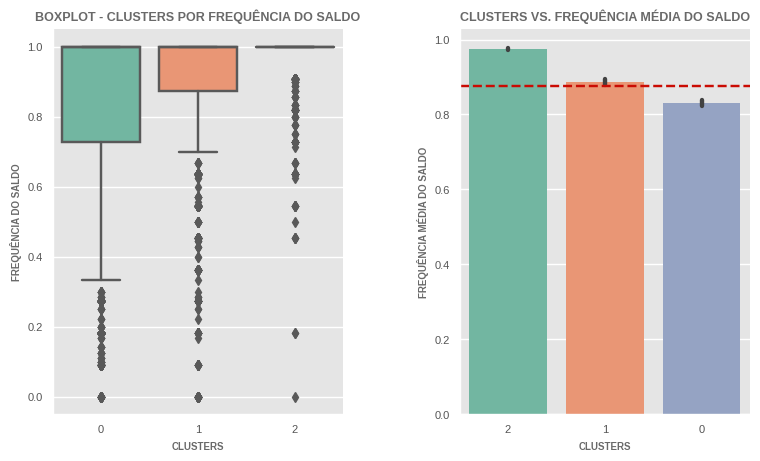

In [135]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='BALANCE_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['BALANCE_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DO SALDO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DO SALDO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['BALANCE_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'BALANCE_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['BALANCE_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DO SALDO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DO SALDO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Saldo atualizado com maior frequência 

Cliente 1: Saldo atualizado com frequência um pouco acima da média

Cliente 2: Saldo atualizado com frequência abaixo da média

**COMPRAS**

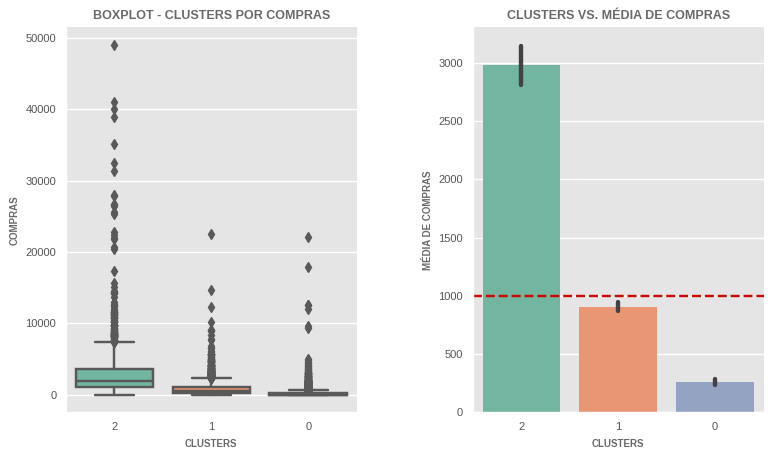

In [136]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. MÉDIA DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MÉDIA DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Quantidade de compras muito acima dos outros

Cliente 1: Quantidade de compras abaixo da média

Cliente 2: Quantidade de compras muito baixa

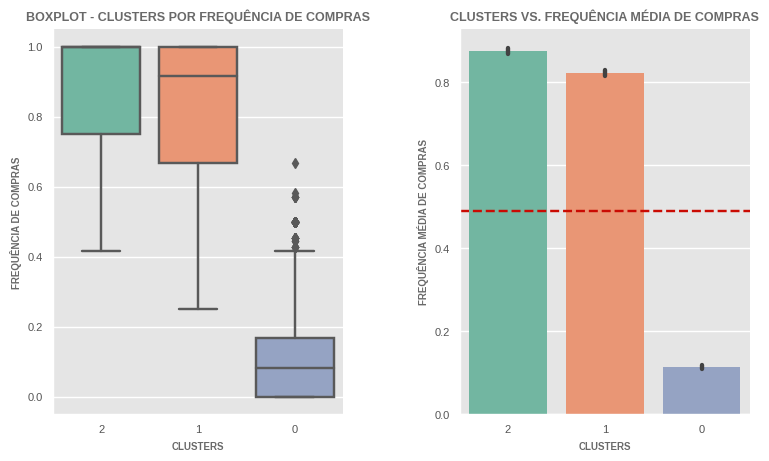

In [137]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Alta frequência de compras

Cliente 1: Alta frequência de compras

Cliente 2: Baixa frequência de compras

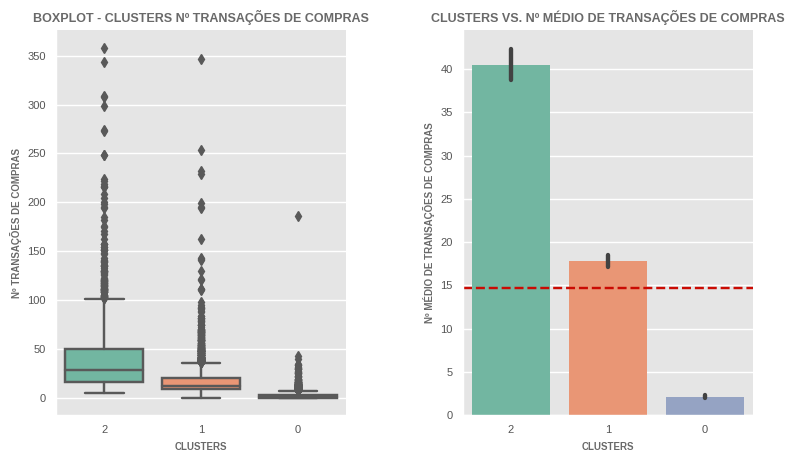

In [138]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PURCHASES_TRX', palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_TRX'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS Nº TRANSAÇÕES DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('Nº TRANSAÇÕES DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['PURCHASES_TRX'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_TRX', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PURCHASES_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. Nº MÉDIO DE TRANSAÇÕES DE COMPRAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('Nº MÉDIO DE TRANSAÇÕES DE COMPRAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior número de transações de compra feitas

Cliente 1: Número de transações de compras feitas acima da média

Cliente 2: Menor número de transações de compra feitas

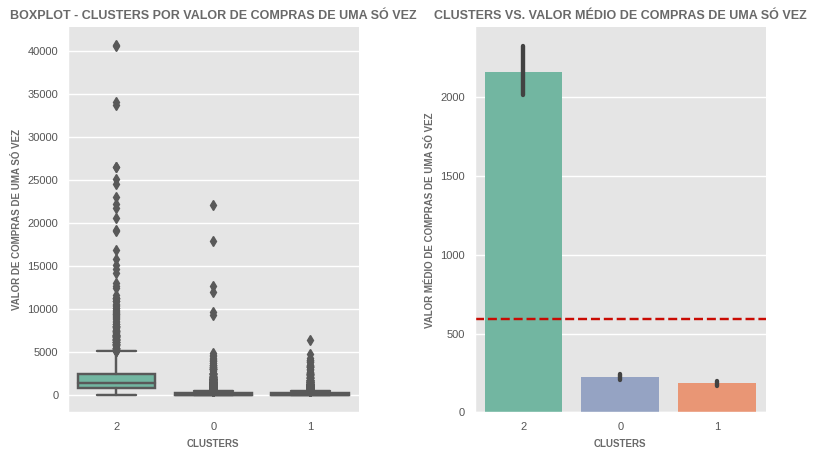

In [139]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='ONEOFF_PURCHASES', palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR VALOR DE COMPRAS DE UMA SÓ VEZ', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('VALOR DE COMPRAS DE UMA SÓ VEZ', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['ONEOFF_PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'ONEOFF_PURCHASES', data=df, order = df.groupby(['cluster'])['ONEOFF_PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. VALOR MÉDIO DE COMPRAS DE UMA SÓ VEZ', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('VALOR MÉDIO DE COMPRAS DE UMA SÓ VEZ', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Valor de compras feitas de uma só vez muito acima dos demais

Cliente 1: Valor de compras feitas de uma só vez muito baixo

CLiente 2: Valor de compras feitas de uma só vez muito baixo

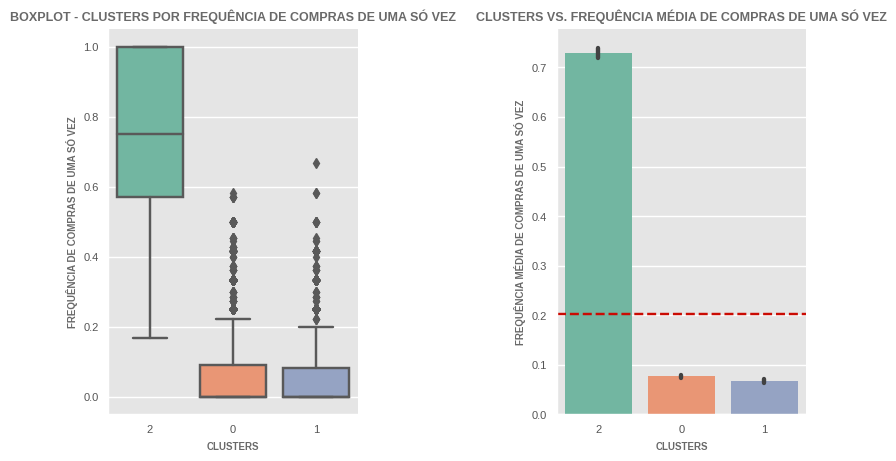

In [140]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='ONEOFF_PURCHASES_FREQUENCY', palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DE COMPRAS DE UMA SÓ VEZ', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DE COMPRAS DE UMA SÓ VEZ', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['ONEOFF_PURCHASES_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'ONEOFF_PURCHASES_FREQUENCY', data=df, palette = 'Set2', order = df.groupby(['cluster'])['ONEOFF_PURCHASES_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DE COMPRAS DE UMA SÓ VEZ', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DE COMPRAS DE UMA SÓ VEZ', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Cliente 0: Frequência de compras feitas de uma só vez muito acima dos demais

Cliente 1: Frequência de compras feitas de uma só vez muito baixa

Cliente 2: Frequência de compras feitas de uma só vez muito baixa

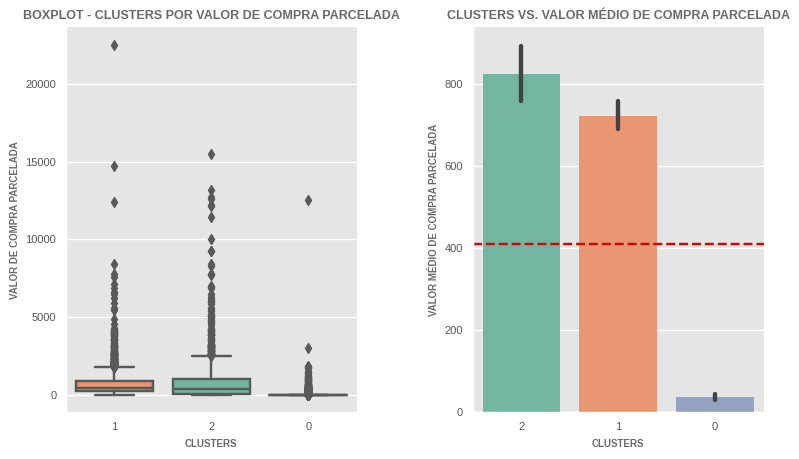

In [141]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='INSTALLMENTS_PURCHASES', order = df.groupby(['cluster'])['INSTALLMENTS_PURCHASES'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR VALOR DE COMPRA PARCELADA', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('VALOR DE COMPRA PARCELADA', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['INSTALLMENTS_PURCHASES'])
ax = sns.barplot(x = 'cluster', y = 'INSTALLMENTS_PURCHASES', data=df, palette = 'Set2', order = df.groupby(['cluster'])['INSTALLMENTS_PURCHASES'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. VALOR MÉDIO DE COMPRA PARCELADA', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('VALOR MÉDIO DE COMPRA PARCELADA', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior valor de compras parceladas

Cliente 1: Alto valor de compras parceladas

Cliente 2: Baixo valor de compras parceladas

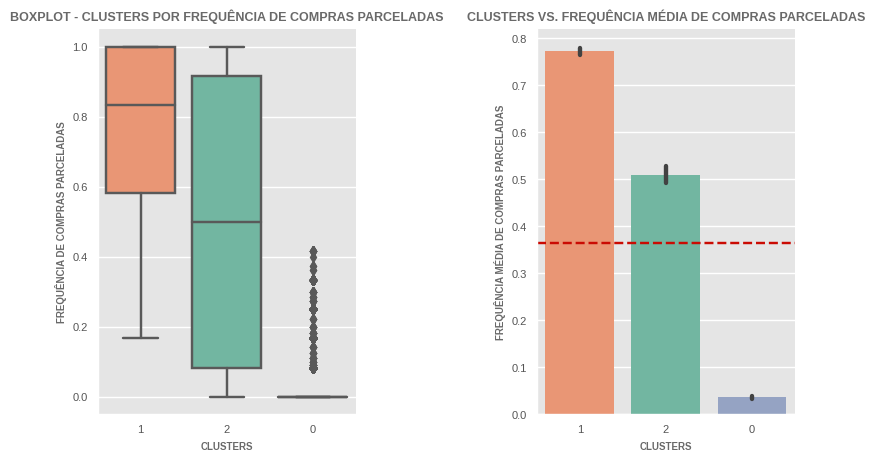

In [142]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='PURCHASES_INSTALLMENTS_FREQUENCY', order = df.groupby(['cluster'])['PURCHASES_INSTALLMENTS_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DE COMPRAS PARCELADAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DE COMPRAS PARCELADAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#fc8d62', '#66c2a5', '#8da0cb']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['PURCHASES_INSTALLMENTS_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'PURCHASES_INSTALLMENTS_FREQUENCY', data=df, order = df.groupby(['cluster'])['PURCHASES_INSTALLMENTS_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DE COMPRAS PARCELADAS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DE COMPRAS PARCELADAS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.7)
plt.show();

Cliente 0: Frequência de compras parceladas acima da média

Cliente 1: Maior frequência de compras parceladas

Cliente 2: Menor frequência de compras parceladas

**DINHEIRO ADIANTADO**

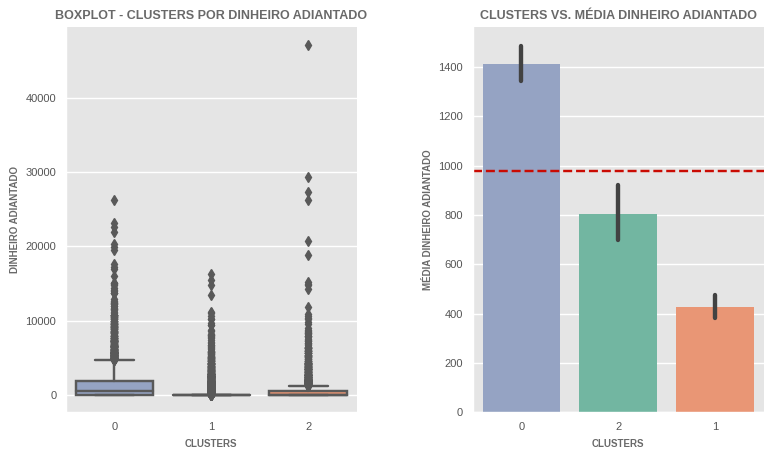

In [143]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE', order = df.groupby(['cluster'])['CASH_ADVANCE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['CASH_ADVANCE'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. MÉDIA DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MÉDIA DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Valor em dinheiro adiantado abaixo da média

Cliente 1: Valor em dinheiro adiantado abaixo da média

Cliente 2: Maior valor em dinheiro adiantado

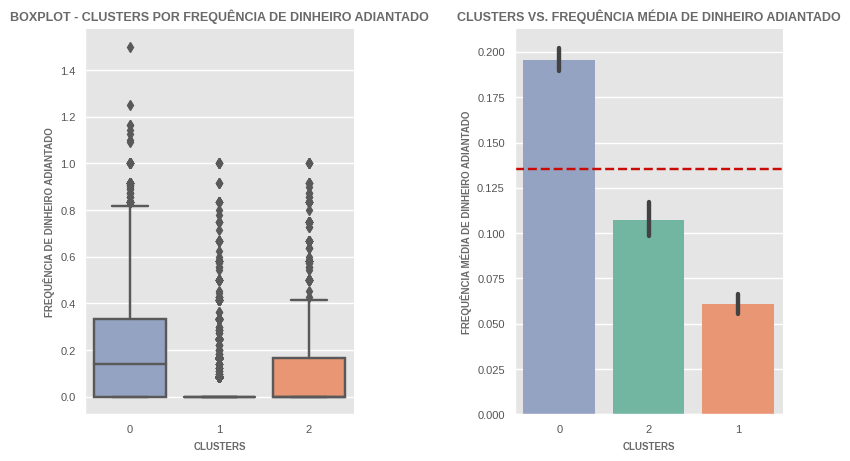

In [144]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE_FREQUENCY', order = df.groupby(['cluster'])['CASH_ADVANCE_FREQUENCY'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR FREQUÊNCIA DE DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA DE DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['CASH_ADVANCE_FREQUENCY'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE_FREQUENCY', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE_FREQUENCY'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. FREQUÊNCIA MÉDIA DE DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('FREQUÊNCIA MÉDIA DE DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.6)
plt.show();

Cliente 0: Frequência de dinheiro adiantado abaixo da média

Cliente 1: Frequência de dinheiro adiantado abaixo da média

Cliente 2: Alta frequência de dinheiro adiantado

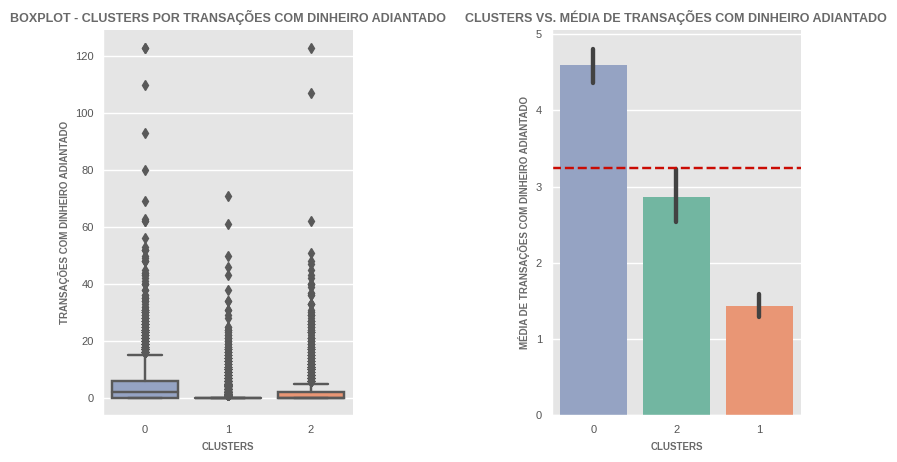

In [145]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CASH_ADVANCE_TRX', order = df.groupby(['cluster'])['CASH_ADVANCE_TRX'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR TRANSAÇÕES COM DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('TRANSAÇÕES COM DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['CASH_ADVANCE_TRX'])
ax = sns.barplot(x = 'cluster', y = 'CASH_ADVANCE_TRX', data=df, order = df.groupby(['cluster'])['CASH_ADVANCE_TRX'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. MÉDIA DE TRANSAÇÕES COM DINHEIRO ADIANTADO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MÉDIA DE TRANSAÇÕES COM DINHEIRO ADIANTADO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Cliente 0: Quantidade de transações realizadas com dinheiro antecipado abaixo da média

Cliente 1: Quantidade de transações realizadas com dinheiro antecipado abaixo da média

Cliente 2: Maior quantidade de transações realizadas com dinheiro antecipado

**LIMITE DE CRÉDITO**

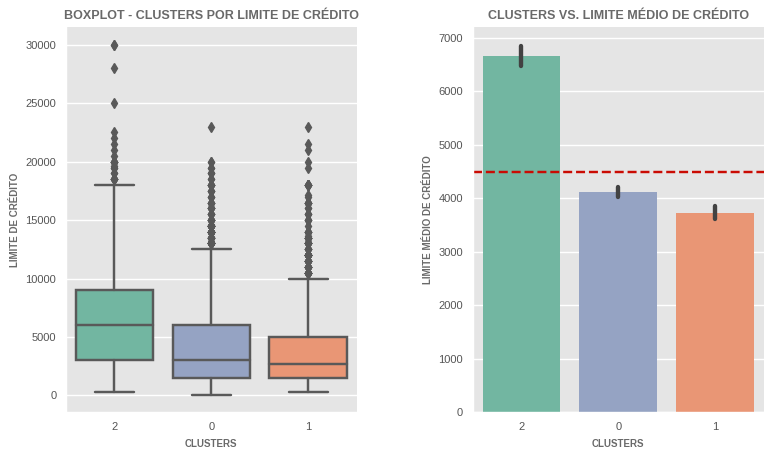

In [146]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='CREDIT_LIMIT', order = df.groupby(['cluster'])['CREDIT_LIMIT'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR LIMITE DE CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('LIMITE DE CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['CREDIT_LIMIT'])
ax = sns.barplot(x = 'cluster', y = 'CREDIT_LIMIT', data=df, order = df.groupby(['cluster'])['CREDIT_LIMIT'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. LIMITE MÉDIO DE CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('LIMITE MÉDIO DE CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior limite de cartão de crédito

Cliente 1: Limite de cartão de crédito abaixo da média

Cliente 2: Limite de cartão de crédito abaixo da média

**PAGAMENTOS**

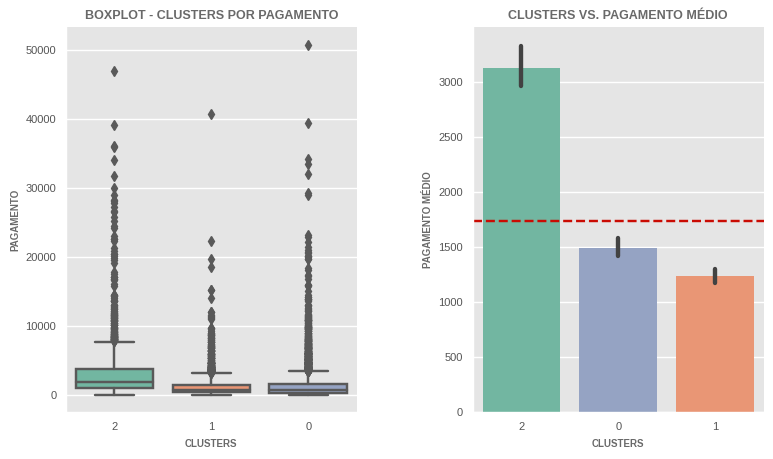

In [147]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PAYMENTS', palette = 'Set2', order = df.groupby(['cluster'])['PAYMENTS'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR PAGAMENTO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PAGAMENTO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#66c2a5', '#8da0cb', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'PAYMENTS', data=df, order = df.groupby(['cluster'])['PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. PAGAMENTO MÉDIO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PAGAMENTO MÉDIO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.4)
plt.show();

Cliente 0: Maior valor do pagamento feito pelo usuário

Cliente 1: Valor do pagamento feito pelo usuário abaixo da média

Cliente 2: Valor do pagamento feito pelo usuário abaixo da média

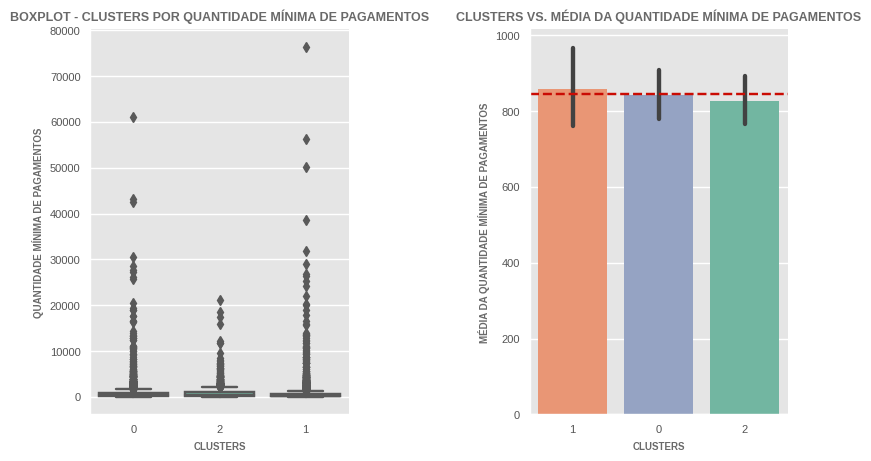

In [148]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
cores = ['#8da0cb', '#66c2a5', '#fc8d62']
sns.set_palette(sns.color_palette(cores))
sns.boxplot(data=df, x='cluster', y='MINIMUM_PAYMENTS', order = df.groupby(['cluster'])['MINIMUM_PAYMENTS'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR QUANTIDADE MÍNIMA DE PAGAMENTOS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('QUANTIDADE MÍNIMA DE PAGAMENTOS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
cores = ['#fc8d62', '#8da0cb', '#66c2a5']
sns.set_palette(sns.color_palette(cores))
media = np.mean(df['MINIMUM_PAYMENTS'])
ax = sns.barplot(x = 'cluster', y = 'MINIMUM_PAYMENTS', data=df, order = df.groupby(['cluster'])['MINIMUM_PAYMENTS'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. MÉDIA DA QUANTIDADE MÍNIMA DE PAGAMENTOS', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('MÉDIA DA QUANTIDADE MÍNIMA DE PAGAMENTOS', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.7)
plt.show();

Cliente 0: Quantidade mínima de pagamentos feitos pelo usuário abaixo da média

Cliente 1: Maior quantidade mínima de pagamentos feitos pelo usuário

Cliente 2: Quantidade mínima de pagamentos feitos pelo usuário um pouco abaixo da média

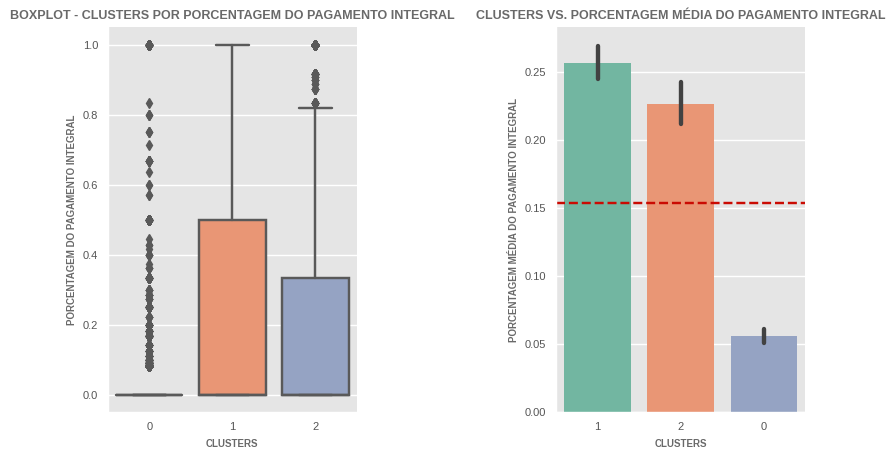

In [149]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='PRC_FULL_PAYMENT', palette = 'Set2', order = df.groupby(['cluster'])['PRC_FULL_PAYMENT'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR PORCENTAGEM DO PAGAMENTO INTEGRAL', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PORCENTAGEM DO PAGAMENTO INTEGRAL', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['PRC_FULL_PAYMENT'])
ax = sns.barplot(x = 'cluster', y = 'PRC_FULL_PAYMENT', data=df, palette = 'Set2', order = df.groupby(['cluster'])['PRC_FULL_PAYMENT'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. PORCENTAGEM MÉDIA DO PAGAMENTO INTEGRAL', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('PORCENTAGEM MÉDIA DO PAGAMENTO INTEGRAL', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.8)
plt.show();

Cliente 0: Maior porcentagem do pagamento integral pago pelo usuário

Cliente 1: Alta porcentagem do pagamento integral pago pelo usuário

Cliente 2: Porcentagem do pagamento integral pago pelo usuário muito baixa

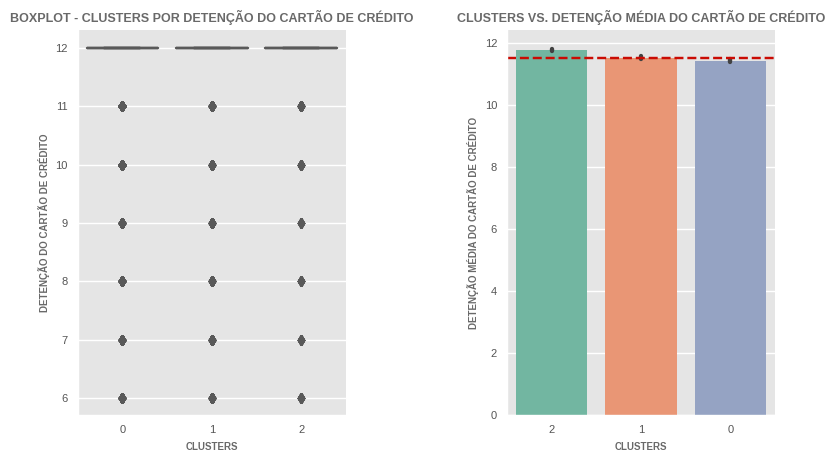

In [150]:
# Plot

plt.figure(figsize=(9,5))

plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='cluster', y='TENURE', palette = 'Set2', order = df.groupby(['cluster'])['TENURE'].median().sort_values(ascending=False).index)
sns.despine()
plt.title('BOXPLOT - CLUSTERS POR DETENÇÃO DO CARTÃO DE CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('DETENÇÃO DO CARTÃO DE CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplot(1, 2, 2)
media = np.mean(df['TENURE'])
ax = sns.barplot(x = 'cluster', y = 'TENURE', data=df, palette = 'Set2', order = df.groupby(['cluster'])['TENURE'].mean().sort_values(ascending=False).index)
sns.despine()
ax.axhline(media, color='r', linestyle='--')
plt.title('CLUSTERS VS. DETENÇÃO MÉDIA DO CARTÃO DE CRÉDITO', fontsize = 9, color ='dimgrey', fontweight = 'bold')
plt.xlabel('CLUSTERS', color = 'dimgrey', labelpad = 5, fontweight = 'bold', fontsize = 7)
plt.ylabel('DETENÇÃO MÉDIA DO CARTÃO DE CRÉDITO', color = 'dimgrey', fontweight = 'bold', fontsize = 7)

plt.subplots_adjust(wspace=0.6)
plt.show();

Detenção do serviço de cartão de crédito para o usuário quase iguais todos os clientes.

Em síntese, por meio da interpretação dos gráficos podemos inferir que:

- **Cliente 0:** A principal característica que difere este grupo dos demais é que possuem um alto saldo com atualização frequente, maior limite de cartão de crédito, realizam uma quantidade de compras muito acima dos outros e com alta frequência, tanto em compras feitas de uma só vez como em compras parceladas e são os que mais fazem pagamento integral. 


- **Cliente 1:** O destaque desse grupo é que eles têm o menor limite de crédito e saldo entre todos, no entanto eles costumam manter seu saldo atualizado frequentemente, pois são o segundo grupo que mais faz compras e estas compras são frequentemente parceladas. Eles também são os que possuem a maior quantidade de pagamentos mínimos, mas também realizam o pagamento integral acima da média.


- **Cliente 2:** O que chama atenção neste grupo é que apesar de possuírem um saldo acima da média e o segundo maior em limite de crédito entre os grupos, são os que têm o saldo atualizado com a menor frequência, pois não realizam compras de maneira geral. Contudo, são os que mais utilizam dinheiro adiantado de forma disparada comparado com os demais e ainda realizam o pagamento de forma integral muito abaixo da média.


Sugestões: